In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') #---> Herramienta para suprimir bloques de codigo del tipo 'Warning' no esperados.

sns.set_theme(style="dark") #---> Determino el estilo de los graficos realizados con la biblioteca seaborn.

In [2]:
internet_penetracion = pd.read_csv(r'Data\Internet_Penetracion_hogares.csv')

internet_penetracion.isna().sum() #---> Verifico que no existan valores nulos

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [3]:
internet_penetracion.info() #---> Corroboro el tipo de variable almacenado en cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 27.1+ KB


In [4]:
internet_penetracion.head() #---> Visualizo el dataset, para tener un panorama de con que vamos a trabajar

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,79
1,2022,4,Capital Federal,123
2,2022,4,Catamarca,66
3,2022,4,Chaco,44
4,2022,4,Chubut,86


<h1><center>Enfoque global enfatizando el incremento anual</center></h1>

In [5]:

#---> Crear un grupo de datos por año y sumar los accesos por cada 100 habitantes
Anio_group = internet_penetracion.groupby(['Año'])['Accesos por cada 100 hogares'].mean()

Anio_group = { #---> separo los valores agrupados anteriormente
    'Anio' : Anio_group.index,
    'Acceso' : Anio_group.values
}
Anio_group = pd.DataFrame(Anio_group) #---> Crear un DataFrame con los años y los valores de acceso

Anio_group = Anio_group.sort_values(['Anio'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

#---> Calcular el porcentaje de diferencia entre un año y el siguiente en la columna 'Acceso'
Anio_group['Porcentaje_Diferencia'] = Anio_group['Acceso'].pct_change() * 100

Anio_group #---> Visualizo el resultado

,Anio,Acceso,Porcentaje_Diferencia
0,2014,36.895833,NaN
1,2015,39.187500,6.211180
2,2016,39.875000,1.754386
3,2017,42.552083,6.713689
4,2018,48.500000,13.977968
5,2019,53.645833,10.609966
6,2020,56.083333,4.543689
7,2021,62.010417,10.568351
8,2022,67.822917,9.373425


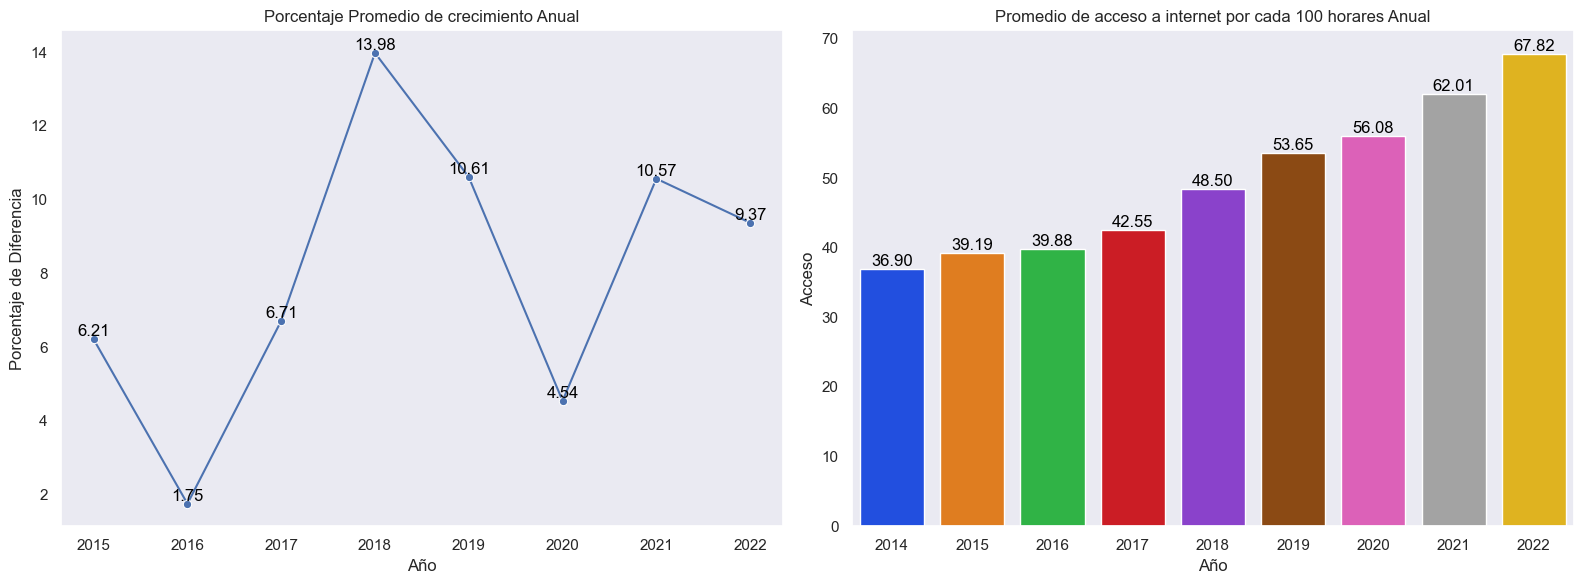

In [6]:
#---> Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

#---> Gráfico de líneas para 'Porcentaje_Diferencia' por año
lineplot = sns.lineplot(x='Anio', y='Porcentaje_Diferencia', data=Anio_group, marker='o', ax=axes[0])
axes[0].set_title('Porcentaje Promedio de crecimiento Anual')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Porcentaje de Diferencia')

#---> Agregar etiquetas con los valores exactos en cada punto del gráfico de líneas
for line in lineplot.lines:
    x, y = line.get_data()
    for i, val in enumerate(y):
        axes[0].text(x[i], val, f'{val:.2f}', color='black', ha='center', va='bottom')

#---> Gráfico de barras para 'Acceso' por año
barplot = sns.barplot(x='Anio', y='Acceso', data=Anio_group, ax=axes[1], palette="bright")
axes[1].set_title('Promedio de acceso a internet por cada 100 horares Anual')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Acceso')

#---> Agregar etiquetas con los valores exactos en cada barra del gráfico de barras
for bar in barplot.patches:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()  #---> Visualizo el resultado


#### En el año 2016, se registró un incremento considerable. No obstante, en el año 2020, se observó un incremento significativamente menor, influenciado por la pandemia. Es crucial tener presente que estos gráficos generalmente reflejan el desarrollo de infraestructuras y la expansión de nuevas líneas, lo cual se vio afectado durante ese año debido a circunstancias excepcionales

<h1><center>Enfoque global en el incremento Trimestral</center></h1>

In [7]:
#---> Crear un grupo de datos por trimestre y sumar los accesos por cada 100 habitantes
trimestres = internet_penetracion.groupby(['Año','Trimestre'])['Accesos por cada 100 hogares'].mean()
anio = [x[0] for x in trimestres.index] #---> desanido los sets creados en la funcion de agrupamiento
trim = [x[1] for x in trimestres.index] #---> desanido los sets creados en la funcion de agrupamiento

trimestres = {
    'Anio' : anio,
    'Trimestre' : trim,
    'Acceso' : trimestres.values
}

trimestres = pd.DataFrame(trimestres)

trimestres = trimestres.sort_values(['Anio','Trimestre'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

#---> Calcular el porcentaje de diferencia entre un año y el siguiente en la columna 'Acceso'
trimestres['Porcentaje_Diferencia'] = trimestres['Acceso'].pct_change() * 100

trimestres.head(10) #---> Visualizo el resultado

,Anio,Trimestre,Acceso,Porcentaje_Diferencia
0,2014,1,36.125000,NaN
1,2014,2,36.625000,1.384083
2,2014,3,37.375000,2.047782
3,2014,4,37.458333,0.222965
4,2015,1,38.541667,2.892102
5,2015,2,38.958333,1.081081
6,2015,3,39.666667,1.818182
7,2015,4,39.583333,-0.210084
8,2016,1,38.875000,-1.789474
9,2016,2,39.875000,2.572347


#### 1. **Agrupación y cálculo del promedio de accesos por trimestre:**
Utiliza groupby para calcular el promedio de accesos por cada 100 hogares agrupados por 'Año' y 'Trimestre'.
Genera listas separadas para 'Año' y 'Trimestre' a partir de los índices creados por el agrupamiento.

#### 2. **Construcción de un nuevo DataFrame:**
Crea un diccionario llamado 'trimestres' que contiene 'Anio', 'Trimestre' y 'Acceso' (promedio de accesos) a partir de los datos obtenidos del agrupamiento.
Convierte este diccionario en un nuevo DataFrame.

#### 3. **Ordenamiento por año y trimestre:**
Ordena el DataFrame 'trimestres' en orden ascendente basado en los valores de 'Año' y 'Trimestre'.

#### 4. **Cálculo del porcentaje de diferencia entre trimestres:**
Calcula el porcentaje de diferencia entre un trimestre y el siguiente en la columna 'Acceso', utilizando el método pct_change() y multiplicando por 100 para obtener el porcentaje.

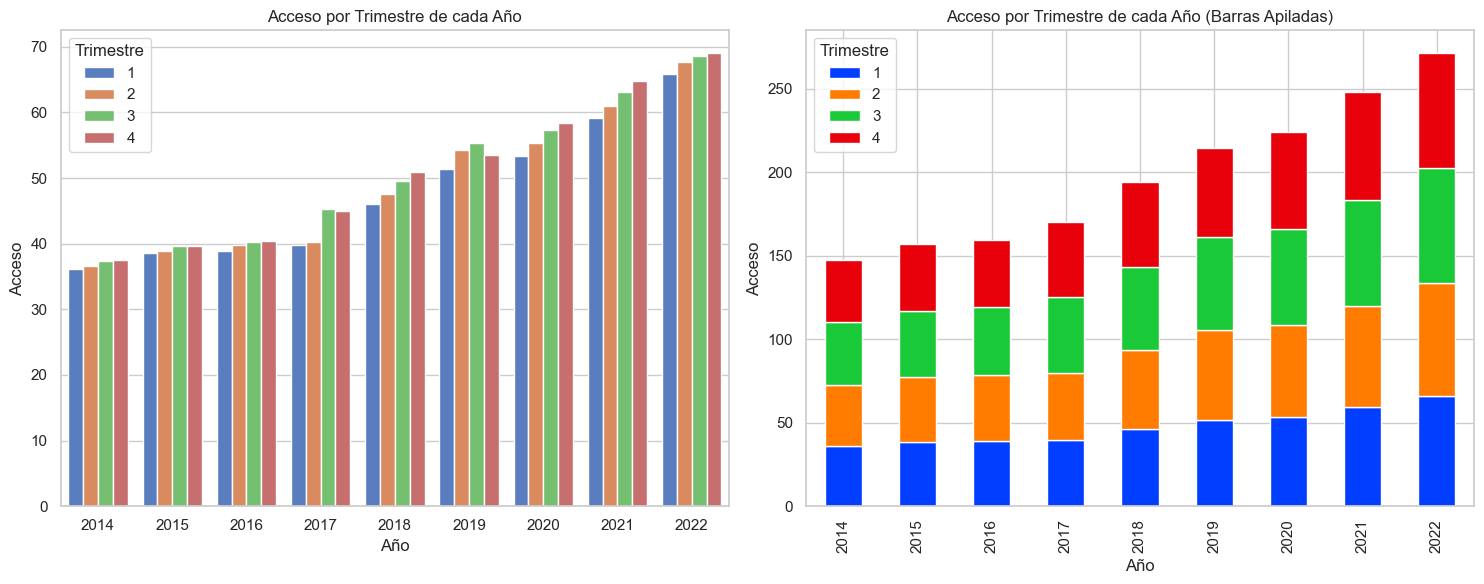

In [8]:
sns.set(style="whitegrid", palette="bright")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#---> Gráfico de barras para cada trimestre por año
barplot = sns.barplot(x='Anio', y='Acceso', hue='Trimestre', data=trimestres, palette='muted', ax=axes[0])

barplot.set_title('Acceso por Trimestre de cada Año')
barplot.set_xlabel('Año')
barplot.set_ylabel('Acceso')

barplot.legend(title='Trimestre')

#---> Crear el gráfico de barras apiladas con la columna 'Acceso'
stacked_data = trimestres.groupby(['Anio', 'Trimestre'])['Acceso'].mean().unstack()
stacked_data.plot(kind='bar', stacked=True, ax=axes[1])

axes[1].set_title('Acceso por Trimestre de cada Año (Barras Apiladas)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Acceso')

plt.tight_layout()
plt.show() #---> Visualizo los graficos


#### El incremento trimestral de accesos a Internet por cada 100 hogares muestra una progresión constante en la representación de las barras apiladas, a excepción del cambio del año 2019 al 2020. En ese periodo, se evidencia una interrupción notoria en el crecimiento, rompiendo la continuidad del progreso constante observado en los trimestres anteriores

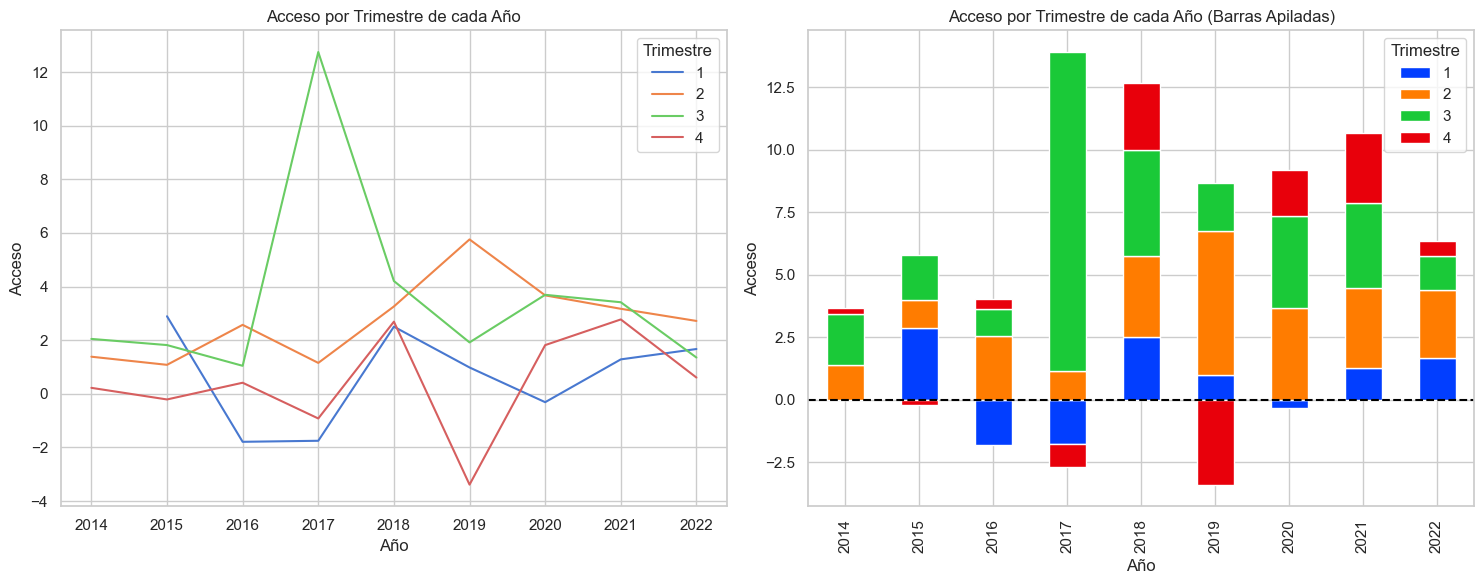

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#---> Gráfico de barras para cada trimestre por año
barplot = sns.lineplot(x='Anio', y='Porcentaje_Diferencia', hue='Trimestre', data=trimestres, palette='muted', ax=axes[0])

barplot.set_title('Acceso por Trimestre de cada Año')
barplot.set_xlabel('Año')
barplot.set_ylabel('Acceso')

barplot.legend(title='Trimestre')

#---> Crear el gráfico de barras apiladas con la columna 'Acceso'
stacked_data = trimestres.groupby(['Anio', 'Trimestre'])['Porcentaje_Diferencia'].mean().unstack()
stacked_data.plot(kind='bar', stacked=True, ax=axes[1])

axes[1].set_title('Acceso por Trimestre de cada Año (Barras Apiladas)')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Acceso')
axes[1].axhline(y=0, linestyle='--', color='black')
plt.tight_layout()
plt.show()

#### Tomando como referencia los valores reflejados en el grafico, se llego a la conclusion de que el segundo y tercer trimestre de cada anio tienen un aumento significativo a diferencia del resto.

Informacion adicional: 
- A finales del 2019, ocurrio un cambio de gobierno en la nacion argentina.
- El 20 de marzo del 2020 inicio la etapa de pandemia.

---

### A nivel global, he llegado a la conclusión de priorizar 2 KPIs:
### Incrementar el porcentaje de adquisición en los trimestres 1 y 4, con posibles acciones tales como:
1. Priorizar la publicidad en las etapas escolares al comienzo del trimestre 1.
2. Ofrecer descuentos durante las festividades de fin de año en el trimestre 4.
### Aumentar el porcentaje de adquisición de internet durante situaciones de cambios gubernamentales, con posibles acciones como:
1. Centrar la publicidad en la continuidad de las suscripciones a largo plazo (para reducir costos a largo plazo).


---

<h1><center>Enfoque en sectores Provinciales\Anual</center></h1>

In [10]:
internet_penetracion.head() #---> Volvemos a visualizar el dataframe con el que vamos a trabajar

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,79
1,2022,4,Capital Federal,123
2,2022,4,Catamarca,66
3,2022,4,Chaco,44
4,2022,4,Chubut,86


In [11]:
#---> Crear un grupo de datos por trimestre y sumar los accesos por cada 100 habitantes
Provincial = internet_penetracion.groupby(['Año','Provincia'])['Accesos por cada 100 hogares'].mean()
anio = [x[0] for x in Provincial.index] #---> desanido los sets creados en la funcion de agrupamiento
Provincia = [x[1] for x in Provincial.index] #---> desanido los sets creados en la funcion de agrupamiento

Provincial = {
    'Anio' : anio,
    'Provincia' : Provincia,
    'Acceso' : Provincial.values
}

Provincial = pd.DataFrame(Provincial)

Provincial = Provincial.sort_values(['Acceso'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

#---> Calcular el porcentaje de diferencia entre un año y el siguiente en la columna 'Acceso'
Provincial['Porcentaje_Diferencia'] = round(Provincial['Acceso'].pct_change() * 100)

Provincial.dropna(inplace=True)

Provincial.head(10) #---> Visualizo el resultado

,Anio,Provincia,Acceso,Porcentaje_Diferencia
66,2016,San Luis,10.00,3.0
42,2015,San Luis,10.00,0.0
90,2017,San Luis,11.50,15.0
69,2016,Santiago Del Estero,15.50,35.0
21,2014,Santiago Del Estero,16.50,6.0
11,2014,La Rioja,16.50,0.0
59,2016,La Rioja,16.75,2.0
35,2015,La Rioja,17.00,1.0
45,2015,Santiago Del Estero,17.00,0.0
8,2014,Formosa,17.75,4.0


### **Agrupación y cálculo del promedio de accesos por trimestre por provincia y año**:

#### 1. Utiliza groupby para calcular el promedio de los accesos por cada 100 hogares agrupados por 'Año' y 'Provincia'.
#### 2. Genera listas separadas para 'Año' y 'Provincia' a partir de los índices creados por el agrupamiento.
#### 3. Construcción de un nuevo DataFrame:
##### a. Crea un diccionario llamado 'Provincial' que contiene 'Año', 'Provincia' y 'Acceso' (promedio de accesos) a partir de los datos obtenidos del agrupamiento.
##### b. Convierte este diccionario en un nuevo DataFrame.
##### c. Ordenamiento y cálculo del porcentaje de diferencia:
##### - Ordena el DataFrame recién creado en orden ascendente basado en el promedio de accesos por cada 100 hogares.
##### - Calcula el porcentaje de diferencia entre un año y el siguiente en la columna 'Acceso'.
##### - Elimina cualquier fila que contenga valores nulos resultantes del cálculo del porcentaje de diferencia.

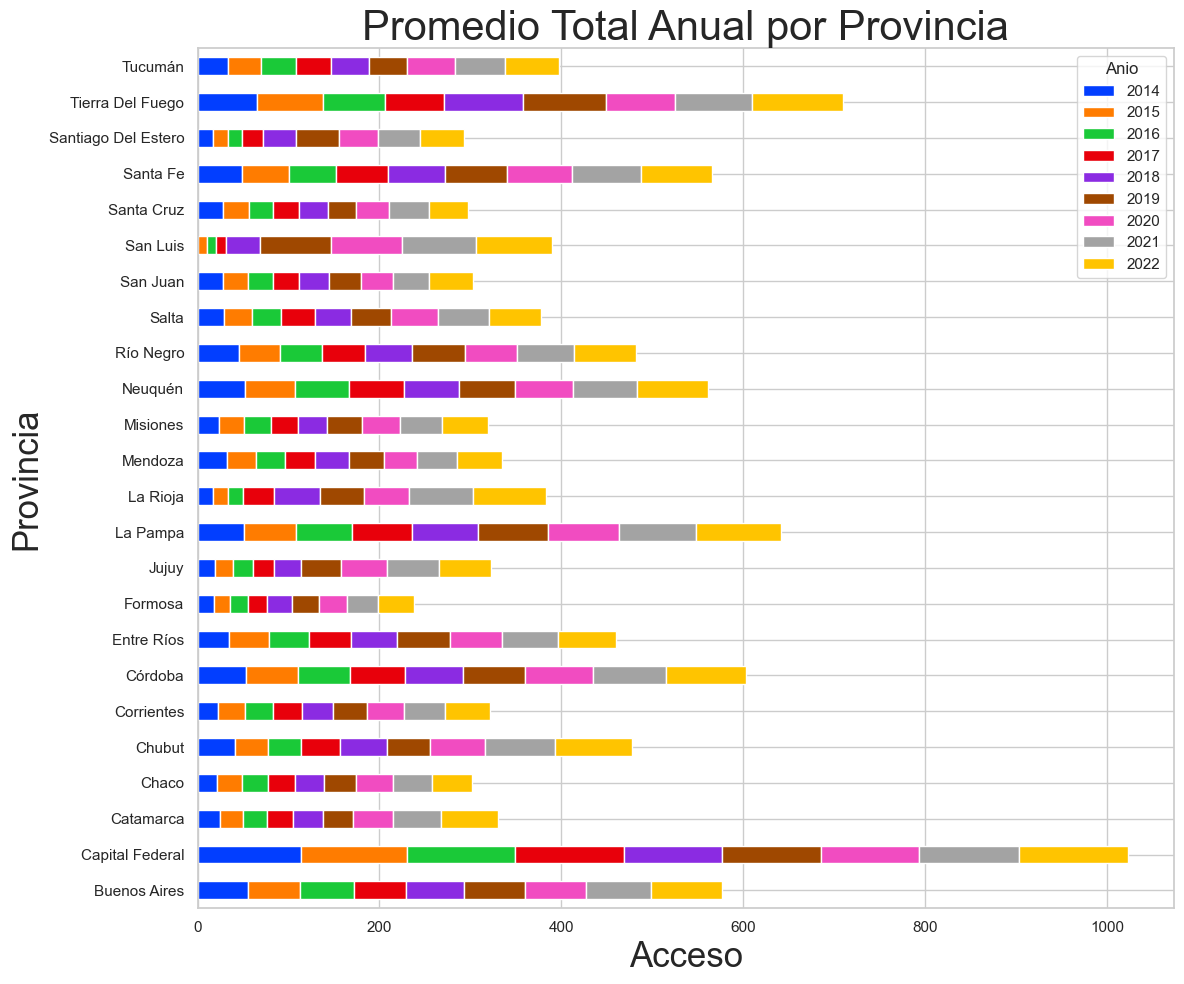

In [12]:
fig, axes = plt.subplots(figsize=(12, 10))

#---> Ordenar las barras apiladas en cada año de forma descendente
stacked_data = Provincial.groupby(['Provincia', 'Anio'])['Acceso'].mean().unstack()

#---> Crear un gráfico de barras apiladas con el eje y invertido
stacked_data.plot(kind='barh', stacked=True, ax=axes)

axes.set_title('Promedio Total Anual por Provincia', fontsize=30)
axes.set_xlabel('Acceso', fontsize=25)
axes.set_ylabel('Provincia', fontsize=25)

plt.tight_layout()
plt.show()

#### La representación gráfica exhibe el crecimiento porcentual anual del acceso en cada provincia a lo largo de los años. Utilizando los datos del DataFrame 'Provincial', se agrupan los valores de 'Acceso' por 'Provincia' y 'Año', calculando el promedio del acceso y presentándolo en un gráfico de barras apiladas de manera horizontal. Esta representación visual permite visualizar la evolución anual del acceso a lo largo de las diferentes provincias.

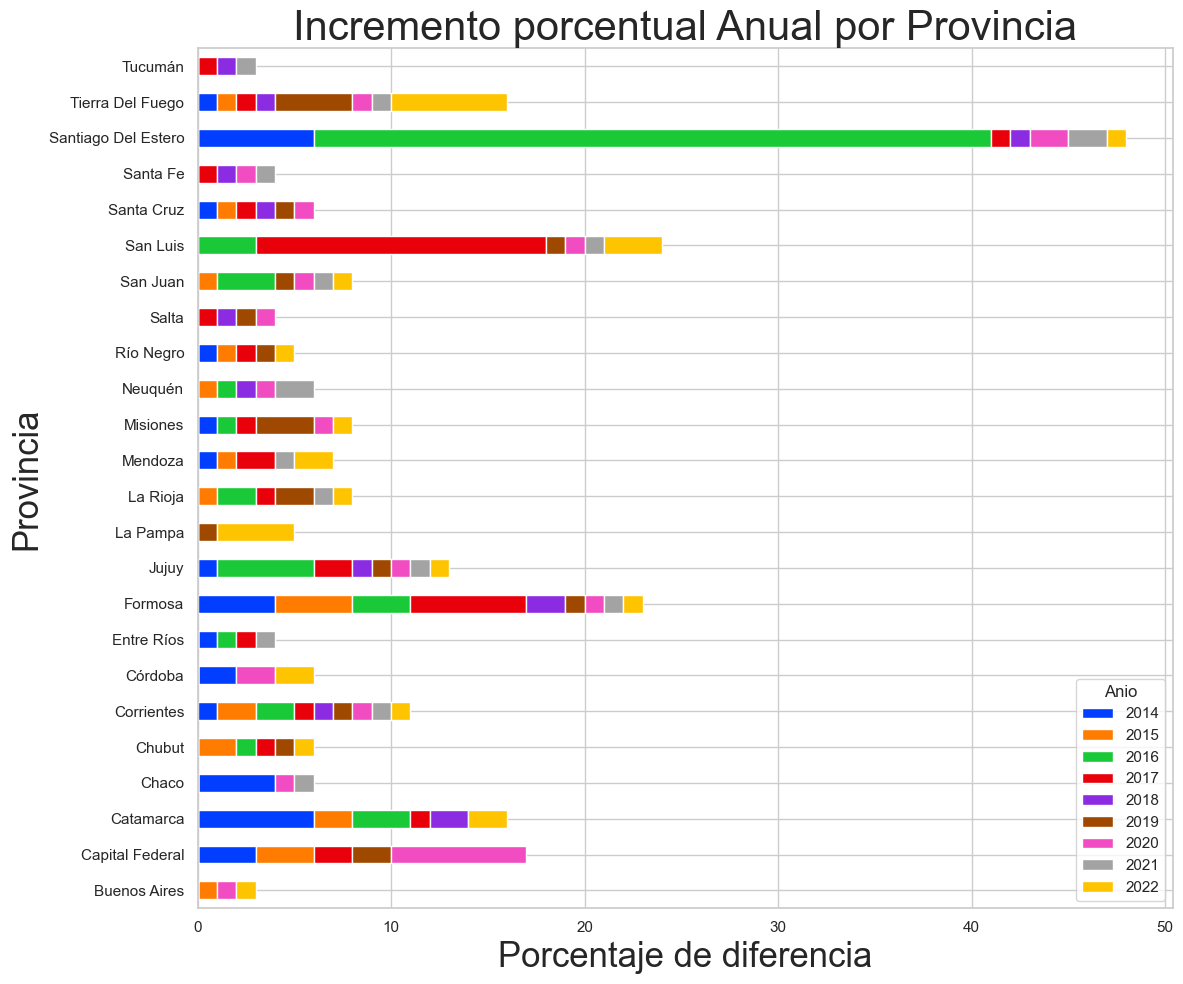

In [13]:
fig, axes = plt.subplots(figsize=(12, 10))

# Corrección: Ajusta el nombre de la columna del año según corresponda en tu DataFrame
stacked_data = Provincial.groupby(['Provincia', 'Anio'])['Porcentaje_Diferencia'].mean().unstack()

#---> Creo un gráfico de barras apiladas con el eje y invertido
stacked_data.plot(kind='barh', stacked=True, ax=axes)

axes.set_title('Incremento porcentual Anual por Provincia', fontsize=30)
axes.set_xlabel('Porcentaje de diferencia', fontsize=25)
axes.set_ylabel('Provincia', fontsize=25)

plt.tight_layout()

plt.show()


## Análisis de Incremento porcentual Anual por Provincia

#### En este bloque de código se representa gráficamente el incremento porcentual anual en relación con la provincia y el año.

#### Como podemos obserbar en el año 2016 Santiago del Estero tenemos un incremento exponencial del promedio de acceso a internet por cada 100 hogares, y lo podemos atribuir a que Se lanzó el programa "Mi Pueblo Conectado" en Santiago del Estero.

[Visita la página oficial de la noticia](https://www.argentina.gob.ar/noticias/se-lanzo-el-programa-mi-pueblo-conectado-en-santiago-del-estero-con-entrega-de-equipamiento)




---

<h1><center>Enfoque en Sectores Provinciales</center></h1>

In [14]:
Provincial = internet_penetracion.groupby(['Provincia'])['Accesos por cada 100 hogares'].mean()

Provincial = {'Provincia' : Provincial.index, 'Acceso' : Provincial.values}

Provincial = pd.DataFrame(Provincial)

Provincial = Provincial.sort_values(['Acceso'], ascending=False) #---> Ordenar el DataFrame por año en orden ascendente

Provincial.dropna(inplace=True)

Provincial.head(10) #---> Visualizo el resultado

Provincial.head(3)

,Provincia,Acceso
1,Capital Federal,113.583333
22,Tierra Del Fuego,78.777778
10,La Pampa,71.305556


#### 1. Agrupación y cálculo del promedio: El código realiza un agrupamiento por provincia en el DataFrame 'internet_penetracion' y calcula el promedio de los 'Accesos por cada 100 hogares' para cada provincia.

#### 2. Creación de un nuevo DataFrame: Se crea un nuevo DataFrame 'Provincial' con dos columnas: 'Provincia' y 'Acceso', utilizando los índices y los valores del promedio calculado previamente.

#### 3. Ordenamiento y eliminación de valores nulos: El DataFrame 'Provincial' se ordena en función del promedio de acceso de manera descendente (mayor a menor) y elimina filas que contienen valores nulos.

#### 4. Visualización de resultados: Muestra las primeras 10 filas del DataFrame 'Provincial', presentando las provincias con mayores promedios de accesos por cada 100 hogares.

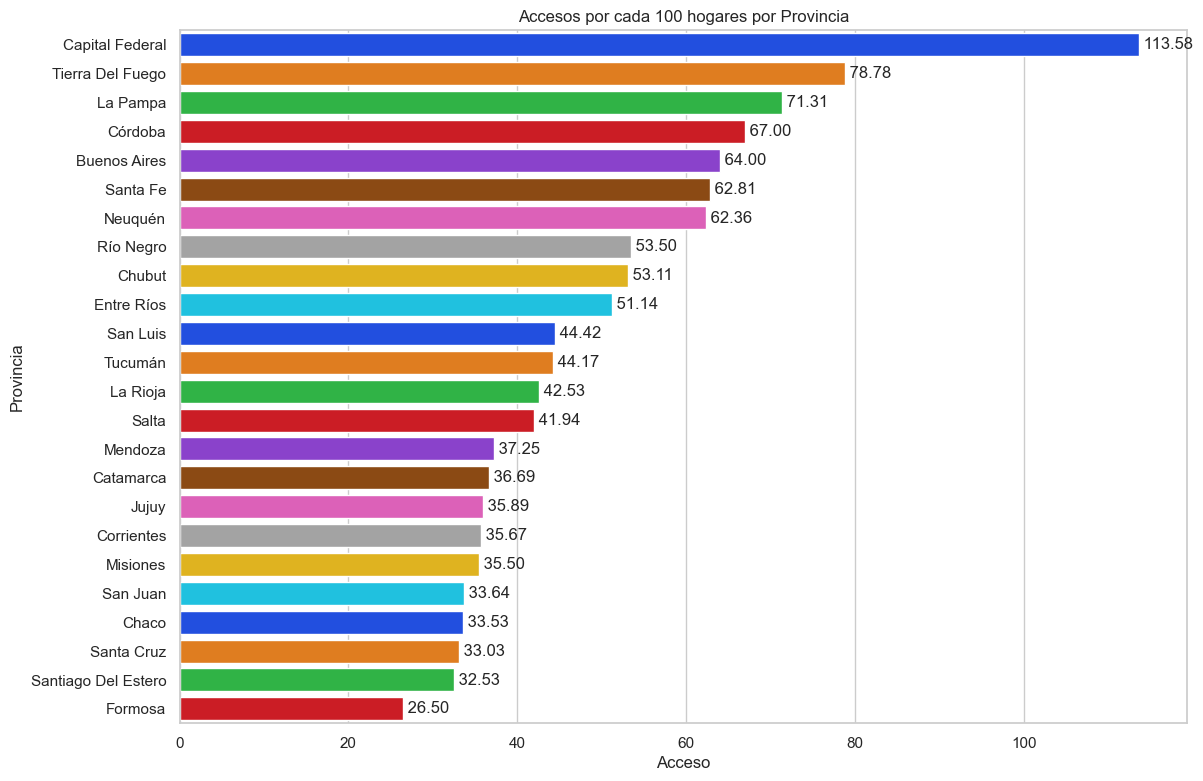

In [15]:
# Crear el gráfico de barras
plt.figure(figsize=(13, 9))  # Ajustar el tamaño del gráfico según tu preferencia

barplot = sns.barplot(x='Acceso', y='Provincia', data=Provincial, palette='bright')

barplot.set_title('Accesos por cada 100 hogares por Provincia')
barplot.set_ylabel('Provincia')

# Agregar los valores en el interior de las barras
for index, value in enumerate(Provincial['Acceso']):
    barplot.text(value, index, f' {value:.2f}', va='center')

plt.show()  # Mostrar el gráfico de barras


#### El propósito de la representación previamente observada es proporcionar un índice sobre la distribución del acceso a internet por cada 100 hogares a nivel provincial. Tras el análisis, se llegó a la conclusión de que se puede establecer un rango de 3 categorías de volumen, diferenciando las provincias según su acceso a internet: alto, medio y bajo, considerando la cantidad de accesos por cada 100 familias

In [16]:
#---> Calculo los cuartiles
cuartiles = Provincial['Acceso'].quantile([0.3, 0.5, 0.7])

#---> Función para asignar a cada provincia un sector (alto, medio, bajo)
def asignar_sector(valor):
    if valor > cuartiles[0.7]:
        return 'alto'
    elif valor > cuartiles[0.3]:
        return 'medio'
    else:
        return 'bajo'

#---> Aplicar la función para crear la columna 'Sector'
Provincial['Volumen_acceso'] = Provincial['Acceso'].apply(asignar_sector)

Provincial

,Provincia,Acceso,Volumen_acceso
1,Capital Federal,113.583333,alto
22,Tierra Del Fuego,78.777778,alto
10,La Pampa,71.305556,alto
6,Córdoba,67.000000,alto
0,Buenos Aires,64.000000,alto
20,Santa Fe,62.805556,alto
14,Neuquén,62.361111,alto
15,Río Negro,53.500000,medio
4,Chubut,53.111111,medio
7,Entre Ríos,51.138889,medio


### Este bloque de código realiza una segmentación de las provincias según el nivel de acceso a internet por cada 100 hogares, utilizando la creación de cuartiles para establecer diferentes categorías (alto, medio, bajo). Aquí está la explicación detallada:

##### 1. **Cálculo de los cuartiles**: Se utilizó la función quantile sobre la columna 'Acceso' del DataFrame 'Provincial' para calcular los valores de los cuartiles en los percentiles 30%, 50% (mediana) y 70%. Estos valores dividen el conjunto de datos en cuatro partes iguales.

##### 2. **Función de asignación de sector**: Se define la función asignar_sector(valor). Esta función toma un valor y lo compara con los cuartiles calculados previamente. Si el valor es mayor que el cuartil del percentil 70%, se asigna al sector 'alto'. Si está entre el percentil 30% y 70%, se asigna al sector 'medio'. Si es menor que el percentil 30%, se asigna al sector 'bajo'.

##### 3. **Aplicación de la función**: Se aplica la función asignar_sector a la columna 'Acceso' del DataFrame 'Provincial'. Los resultados de esta función definen una nueva columna llamada 'Volumen_acceso', que asigna a cada provincia su respectivo sector (alto, medio, bajo) en función de su nivel de acceso a internet.

#### En resumen, este bloque de código segmenta las provincias en tres categorías (alto, medio, bajo) basadas en su nivel de acceso a internet por cada 100 hogares, utilizando cuartiles para definir estos segmentos. Esto permite una clasificación más detallada y específica de las provincias en función de su nivel de conectividad.

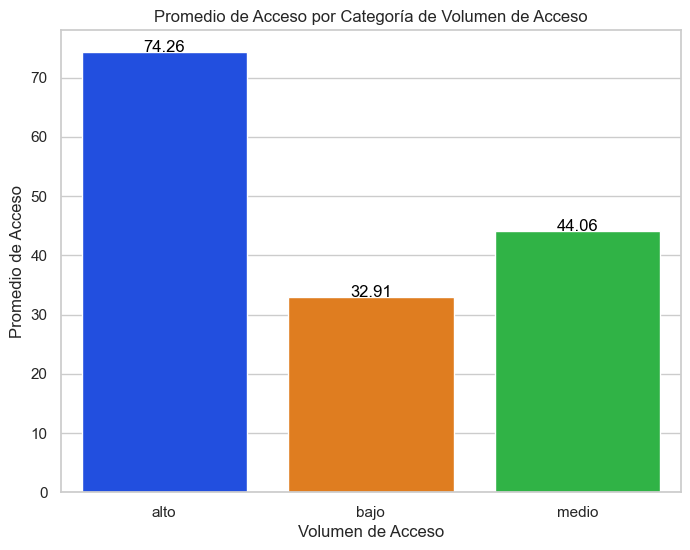

In [17]:
#---> Calcula el promedio de acceso para cada categoría de 'Volumen_acceso'
promedio_acceso = Provincial.groupby('Volumen_acceso')['Acceso'].mean().reset_index()

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Volumen_acceso', y='Acceso', hue='Volumen_acceso', data=promedio_acceso)

barplot.set_title('Promedio de Acceso por Categoría de Volumen de Acceso')
barplot.set_xlabel('Volumen de Acceso')
barplot.set_ylabel('Promedio de Acceso')

#---> Agrega etiquetas en la punta de cada barra con los valores respectivos
for index, row in promedio_acceso.iterrows():
    barplot.text(row.name, row.Acceso, f'{row.Acceso:.2f}', color='black', ha="center")

plt.show()


#### Procedimos a clasificar las provincias en tres sectores distintos según su nivel de acceso a internet. En este contexto, optamos por seleccionar las provincias pertenecientes al grupo de volumen medio. Este grupo se destaca por su potencial de inversión y crecimiento a corto y mediano plazo, además de su alta densidad poblacional. Es importante resaltar que, a pesar de estas características favorables, estas áreas aún presentan una gran extensión territorial por cubrir en términos de conexiones a internet.

#### Este análisis se respalda con el siguiente bloque de código, el cual calcula el promedio de acceso para cada categoría de 'volumen_acceso' en el DataFrame 'Provincial'. Posteriormente, se crea un gráfico de barras que muestra estos promedios por cada categoría de volumen de acceso. Este gráfico ofrece una representación visual clara de cómo varía el promedio de acceso en relación con los distintos niveles de volumen de acceso a internet.


In [18]:
Volumen_bajo = Provincial.loc[Provincial['Volumen_acceso'] == 'medio'] #---> guardo el los totales en un nuevo dataframe

provincias_volumen = Volumen_bajo['Provincia'].values #---> guardamos todas las provincias dentro de una variable para trabajar luego con ellas

Volumen_bajo

,Provincia,Acceso,Volumen_acceso
15,Río Negro,53.500000,medio
4,Chubut,53.111111,medio
7,Entre Ríos,51.138889,medio
18,San Luis,44.416667,medio
23,Tucumán,44.166667,medio
11,La Rioja,42.527778,medio
16,Salta,41.944444,medio
12,Mendoza,37.250000,medio
2,Catamarca,36.694444,medio
9,Jujuy,35.888889,medio


#### En este bloque de código, estamos filtrando las provincias que se encuentran dentro de la categoría de 'volumen medio' en términos de acceso a internet por cada 100 habitantes, utilizando el DataFrame 'Provincial'. Posteriormente, guardamos esta información filtrada en un nuevo DataFrame llamado 'Volumen_bajo'. Además, almacenamos todas las provincias que cumplen con este criterio en la variable 'provincias_volumen' para utilizarlas en análisis posteriores. La última línea muestra el contenido del DataFrame 'Volumen_bajo', que contiene las provincias con acceso de volumen medio a internet.

In [19]:
total_informacion_provincias_volumen = internet_penetracion.loc[internet_penetracion['Provincia'].isin(provincias_volumen)]

total_informacion_provincias_volumen = total_informacion_provincias_volumen.sort_values(['Provincia','Año','Trimestre'], ascending=True) #---> Ordenar el DataFrame por año en orden ascendente

total_informacion_provincias_volumen

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
842,2014,1,Catamarca,24
818,2014,2,Catamarca,25
794,2014,3,Catamarca,25
770,2014,4,Catamarca,26
746,2015,1,Catamarca,25
...,...,...,...,...
119,2021,4,Tucumán,56
95,2022,1,Tucumán,57
71,2022,2,Tucumán,59
47,2022,3,Tucumán,61


#### Obtenemos información exhaustiva del bloque seleccionado con el objetivo de mejorar y llevar a cabo estudios más detallados en relación a esta área específica del acceso a internet por cada 100 hogares. Este bloque de código filtra los datos de 'internet_penetracion' para seleccionar la información total de las provincias que coinciden con la variable 'provincias_volumen'. Posteriormente, ordena este conjunto de datos filtrado, 'total_informacion_provincias_volumen', en base a 'Provincia', 'Año' y 'Trimestre' en orden ascendente. Este DataFrame resultante contiene la información detallada y ordenada de las provincias, mostrando su penetración de internet a lo largo de los años y trimestres.

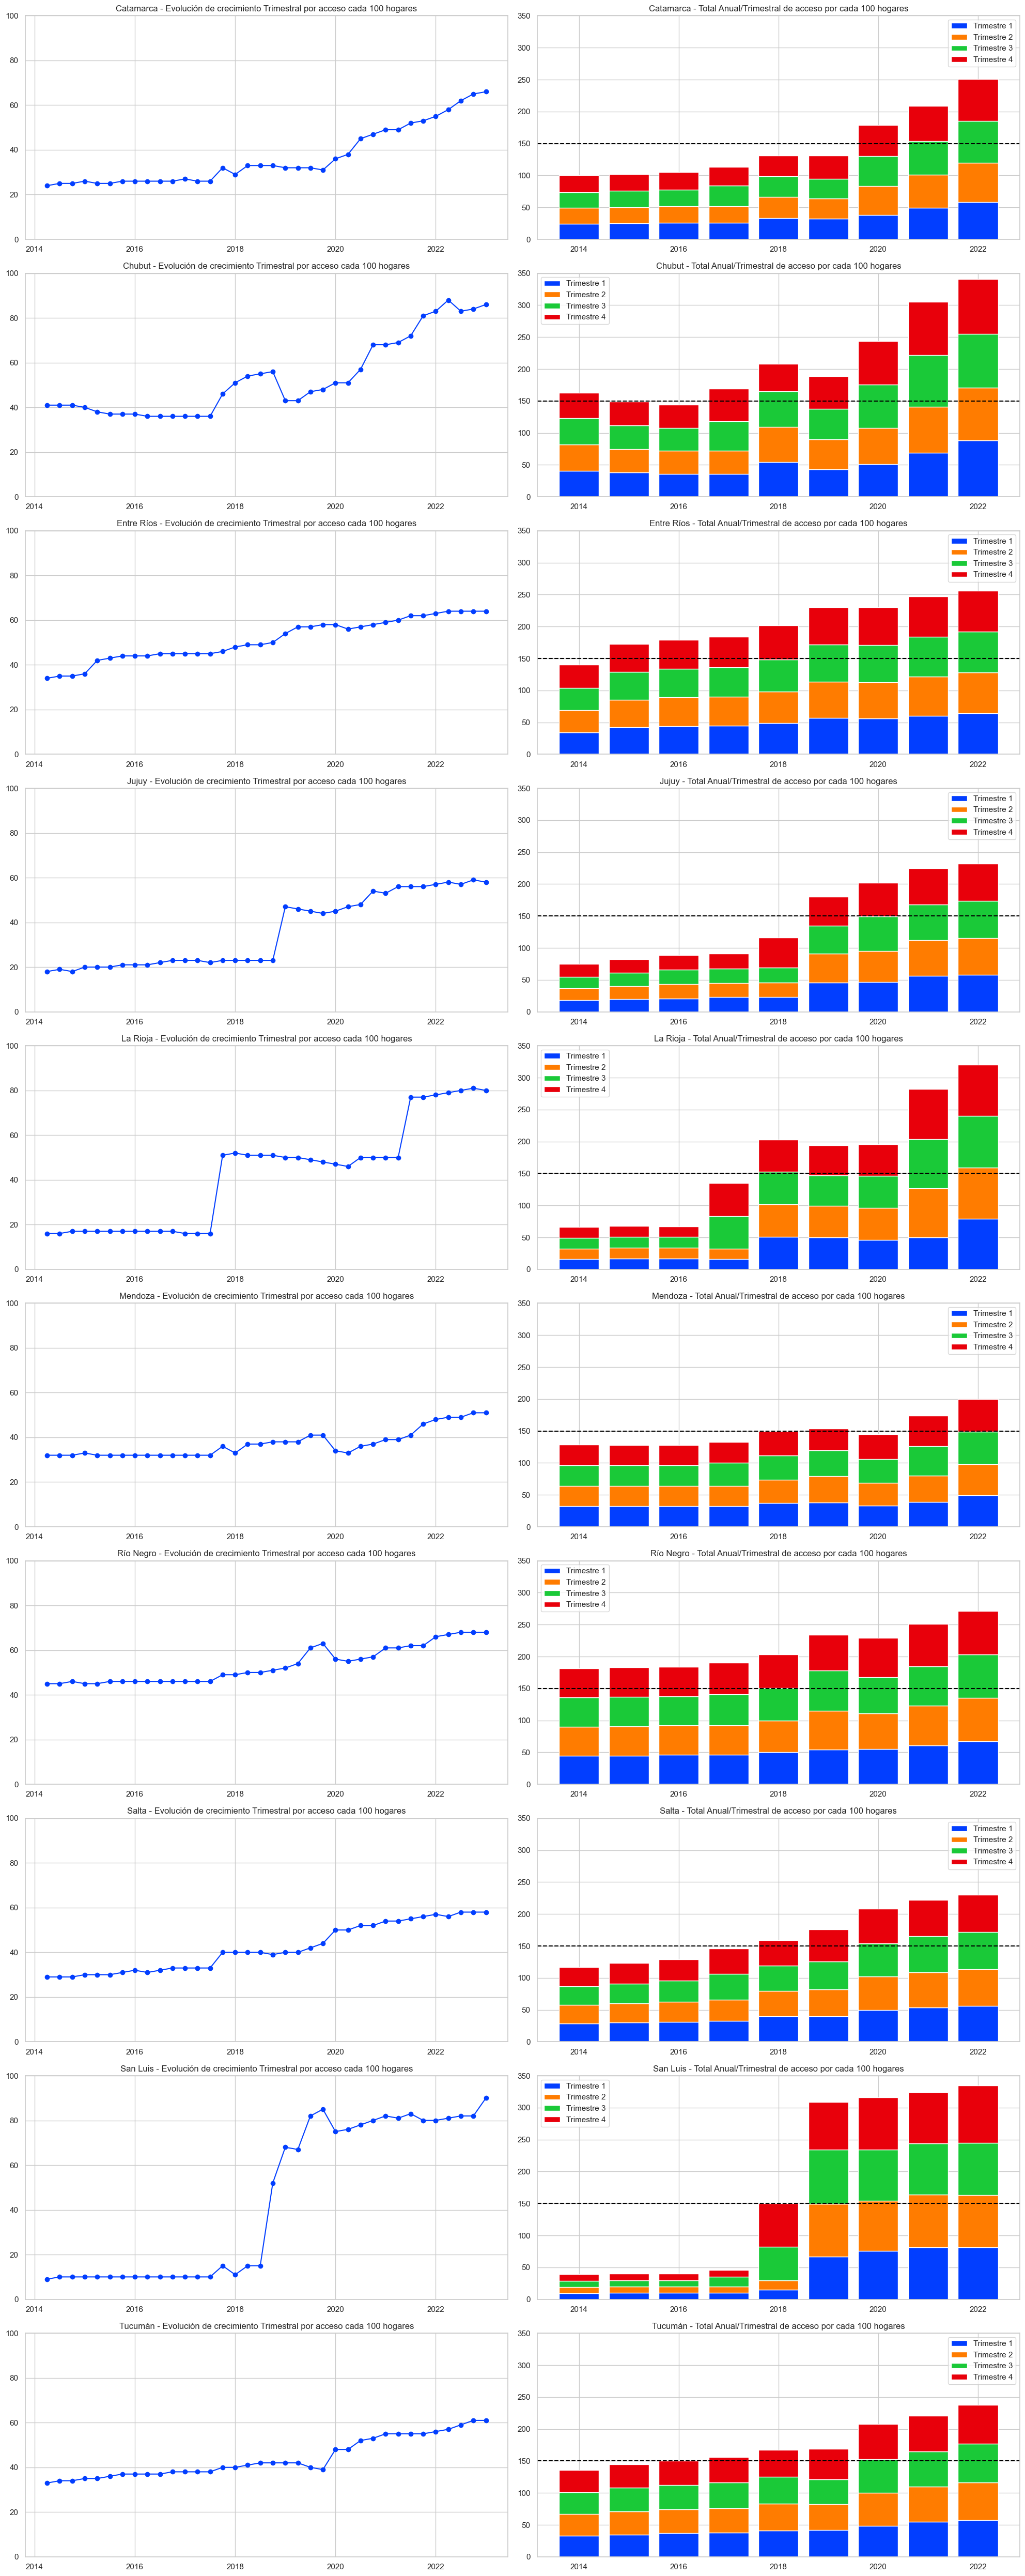

In [20]:
provincias = total_informacion_provincias_volumen['Provincia'].unique()

fig, axs = plt.subplots(len(provincias), 2, figsize=(20, 5*len(provincias)))

# Para cada provincia, crea un gráfico de líneas y un gráfico de barras apiladas
for i, provincia in enumerate(provincias):
    data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == provincia]
    
    # Gráfico de líneas
    axs[i, 0].plot(data_provincia['Año'] + data_provincia['Trimestre']/4, data_provincia['Accesos por cada 100 hogares'], marker='o')  # Agrega puntos a lo largo de las líneas
    axs[i, 0].set_title(f'{provincia} - Evolución de crecimiento Trimestral por acceso cada 100 hogares')
    axs[i, 0].set_ylim([0, 100])  # Establece la escala del eje y
    
    # Gráfico de barras apiladas
    years = data_provincia['Año'].unique()
    bottom = np.zeros(len(years))
    for trimestre in sorted(data_provincia['Trimestre'].unique()):
        data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
        axs[i, 1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
        bottom += data_trimestre['Accesos por cada 100 hogares'].values
    axs[i, 1].set_title(f'{provincia} - Total Anual/Trimestral de acceso por cada 100 hogares')
    axs[i, 1].legend()
    axs[i, 1].axhline(y=150, linestyle='--', color='black')
    axs[i, 1].set_ylim([0, 350])  # Establece la escala del eje y

# Muestra el gráfico
plt.tight_layout()
plt.show()


### Como podemos observar en el estudio de los diagramas, la mayoría de las provincias pertenecientes al grupo de volumen medio en la categoría de promedio de accesos por cada 100 hogares experimentaron un aumento exponencial en los años 2017/2018, indicando una clara tendencia en este aspecto. Sin embargo, este punto será abordado más detalladamente en breve, durante el análisis de las tecnologías y la velocidad. Aunque muchos de estos aumentos pueden atribuirse a inversiones conjuntas con el gobierno a través de proyectos destinados a mejorar la conectividad en todo el país, al final del documento se adjuntarán bibliografías que refutan esta afirmación.

---

<h1> <center>Tecnologia y Velocidad por Provincia de volumen medio</center> </h1>

In [21]:
tecnologia_provincia = pd.read_csv(r'Data\Internet_Accesos-por-tecnologia.csv') #---> Leo el dataset referido al acceso por tecnologia

#---> ETL
tecnologia_provincia = tecnologia_provincia.loc[tecnologia_provincia['Provincia'].isin(provincias_volumen)] 

tecnologia_provincia['Trimestre'] = tecnologia_provincia['Trimestre'].str.replace(' *', '').astype(int) #---> Realizo normalizacion de los valores de la columna Trimestre

tecnologia_provincia['Año'] = tecnologia_provincia['Año'].str.replace(' *', '').astype(int) #---> Realizo normalizacion de los valores de la columna Año


In [22]:
tecnologia_provincia.isna().sum() #---> Corroboro que el dataset no contenga valores faltantes o nulos

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [23]:
tecnologia_provincia.info() #---> Verifico el tipo de variable almacenada en cada columna

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 2 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           360 non-null    int32  
 1   Trimestre     360 non-null    int32  
 2   Provincia     360 non-null    object 
 3   ADSL          360 non-null    float64
 4   Cablemodem    360 non-null    float64
 5   Fibra óptica  360 non-null    float64
 6   Wireless      360 non-null    float64
 7   Otros         360 non-null    float64
 8   Total         360 non-null    float64
dtypes: float64(6), int32(2), object(1)
memory usage: 25.3+ KB


In [24]:
tecnologia_provincia #---> 

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0
7,2022,4,Entre Ríos,55507.0,135746.0,40798.0,26414.0,12509.0,270974.0
9,2022,4,Jujuy,17880.0,52390.0,42626.0,4067.0,1255.0,118218.0
11,2022,4,La Rioja,6120.0,54387.0,19328.0,6395.0,32.0,86262.0
...,...,...,...,...,...,...,...,...,...
852,2014,1,Mendoza,148970.0,12076.0,2480.0,37.0,2282.0,165845.0
855,2014,1,Río Negro,64886.0,24156.0,876.0,3576.0,1572.0,95066.0
856,2014,1,Salta,73131.0,17538.0,45.0,8.0,568.0,91290.0
858,2014,1,San Luis,11306.0,428.0,354.0,21.0,448.0,12557.0


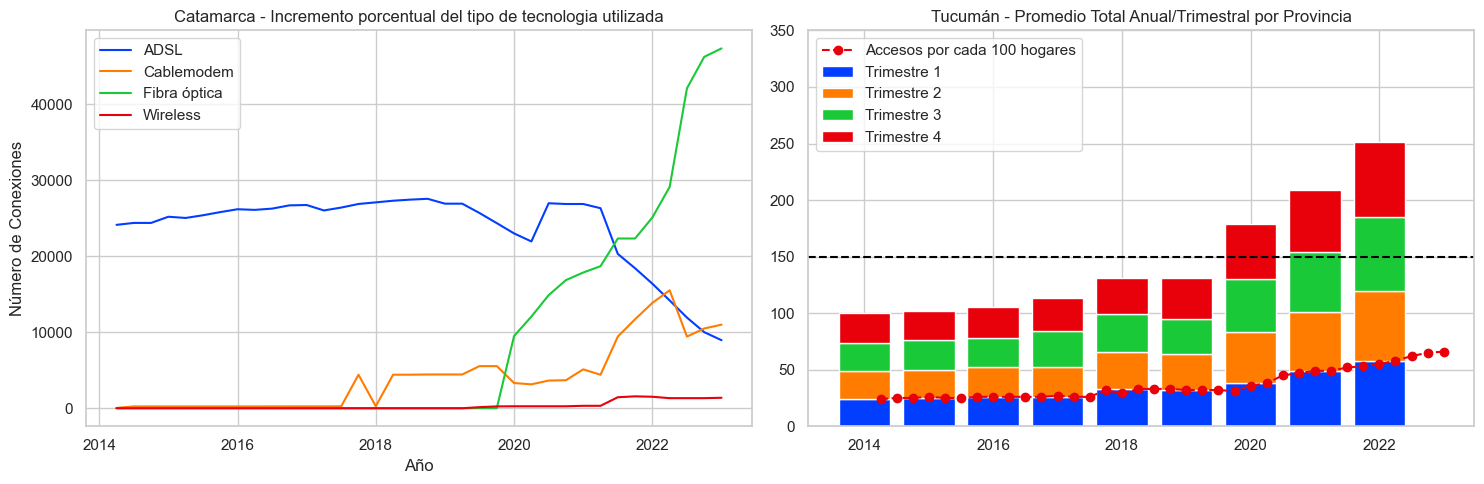

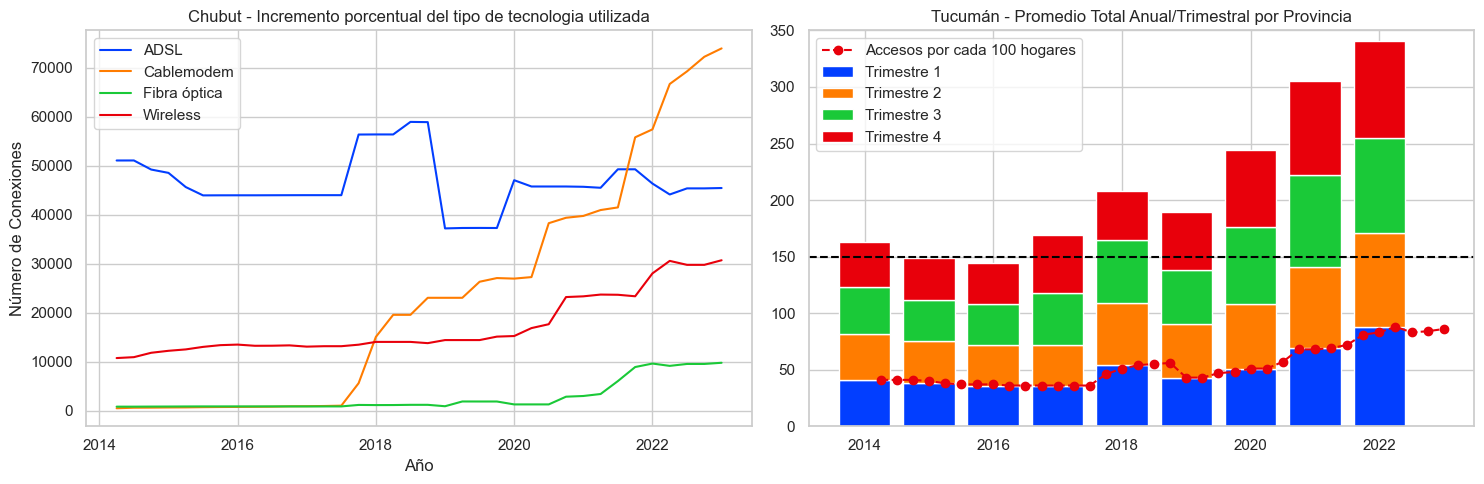

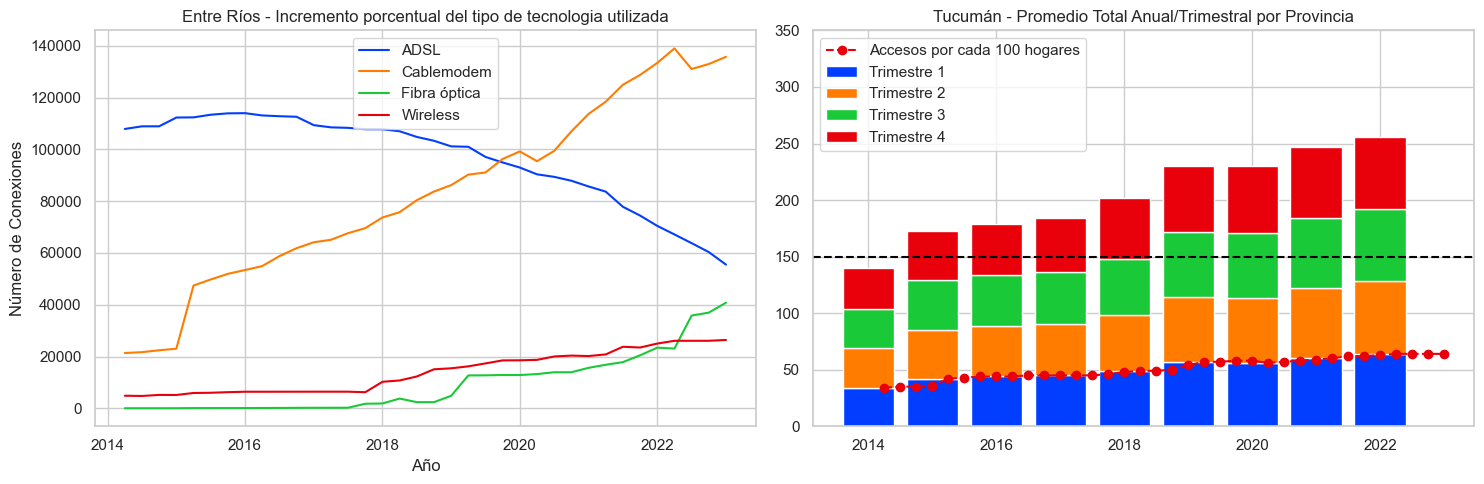

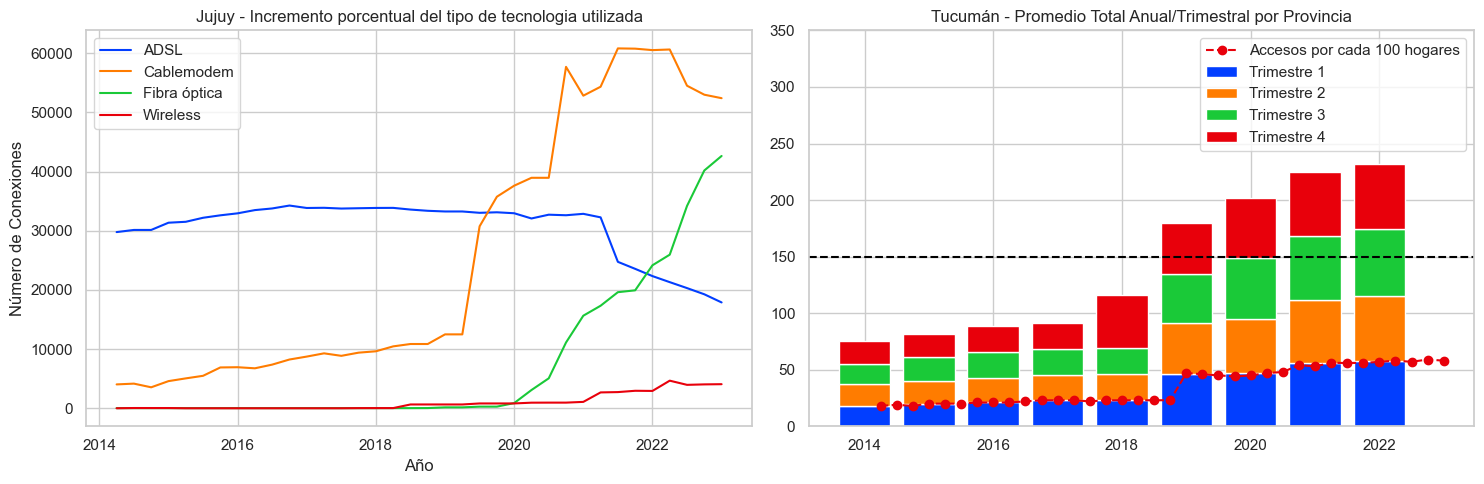

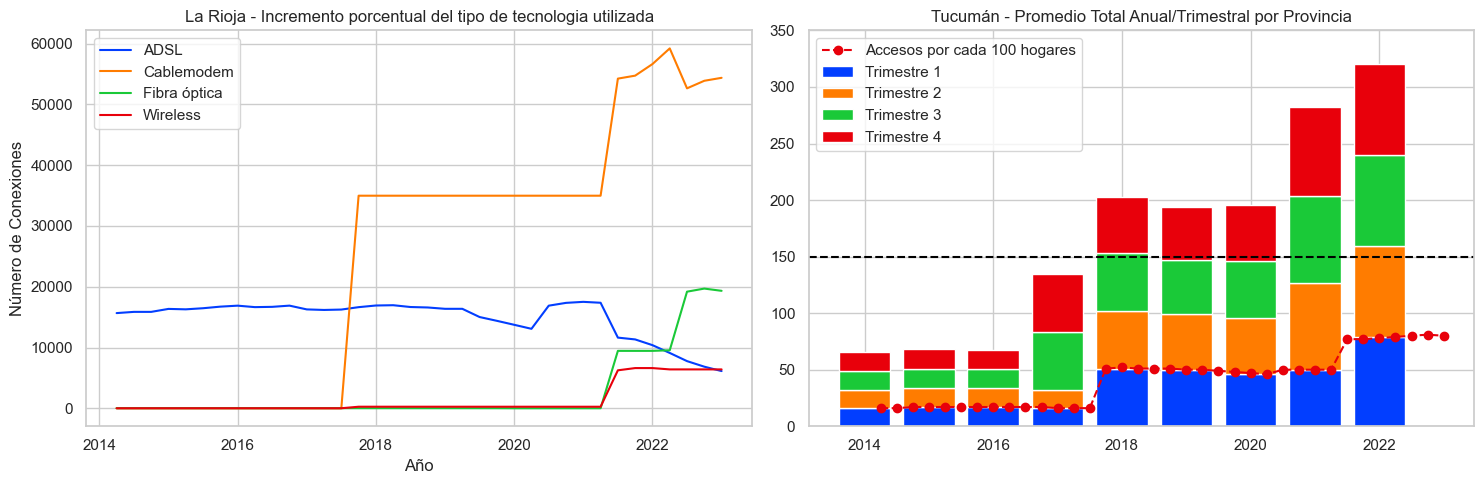

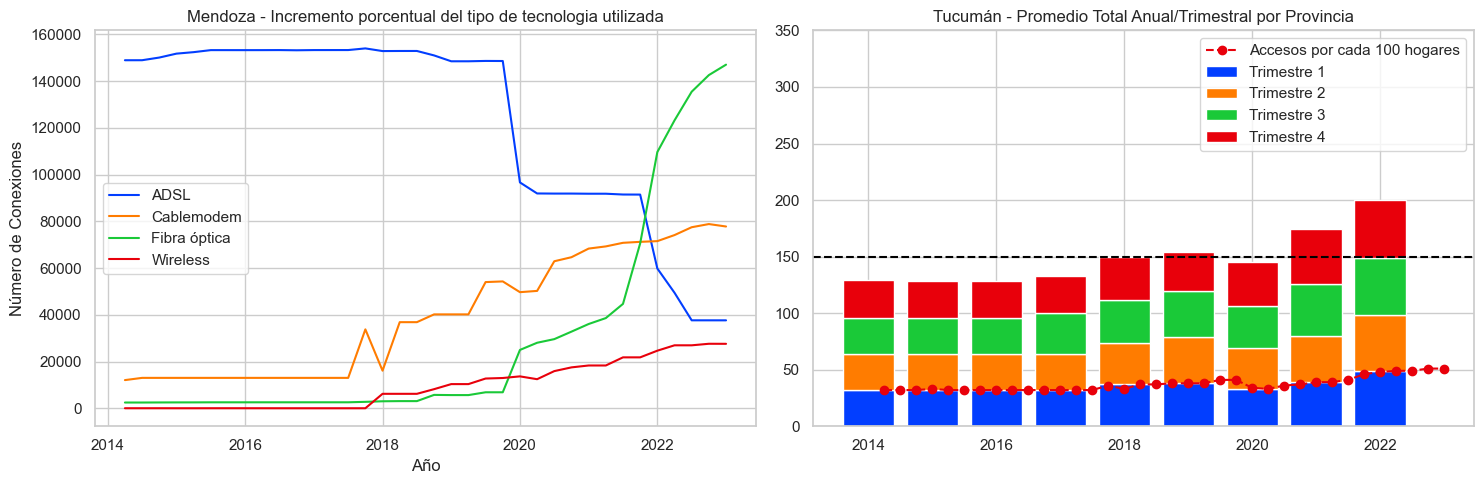

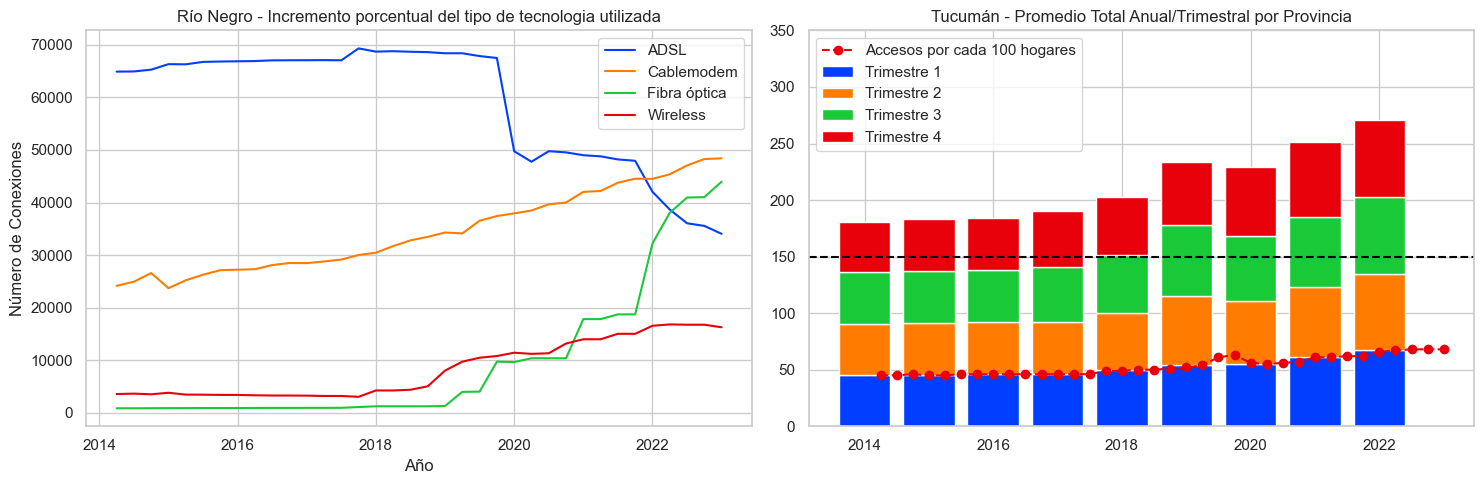

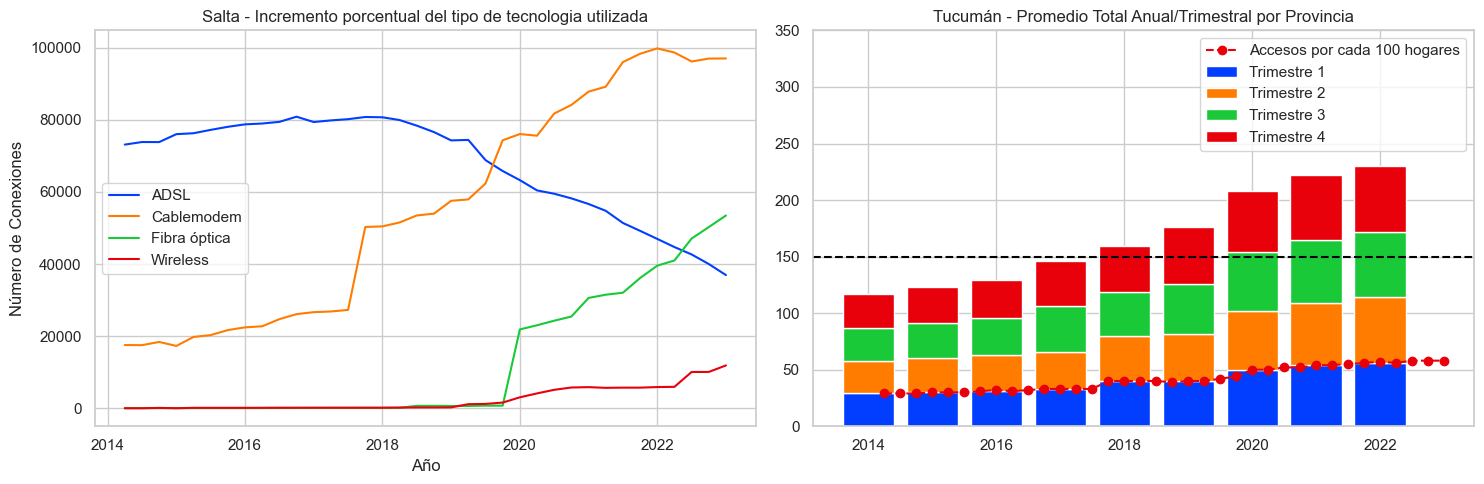

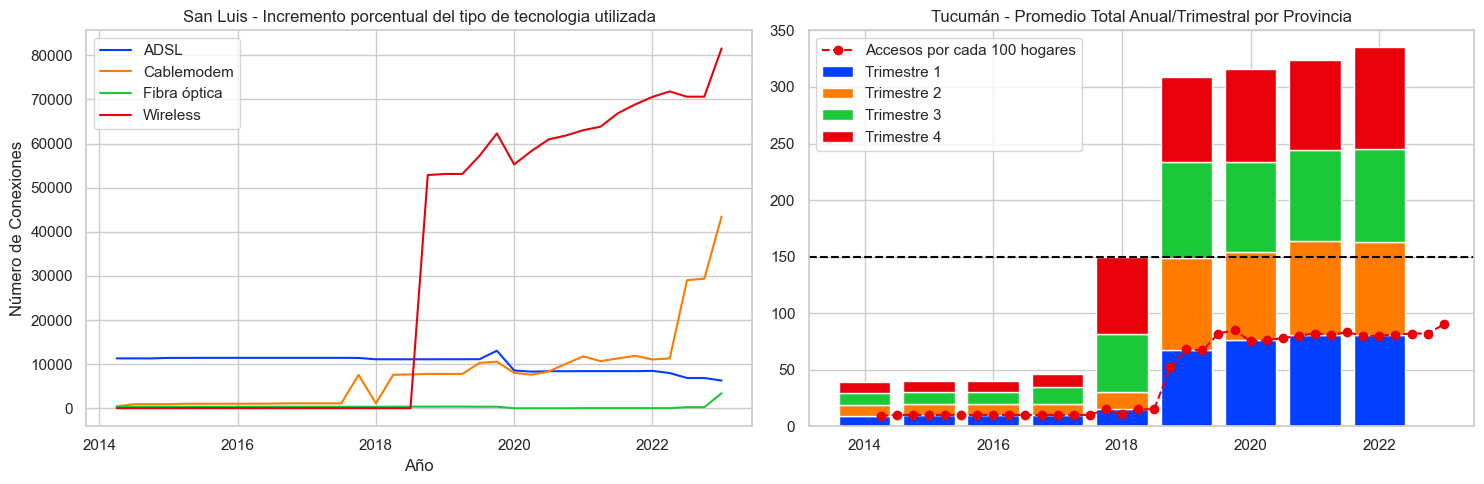

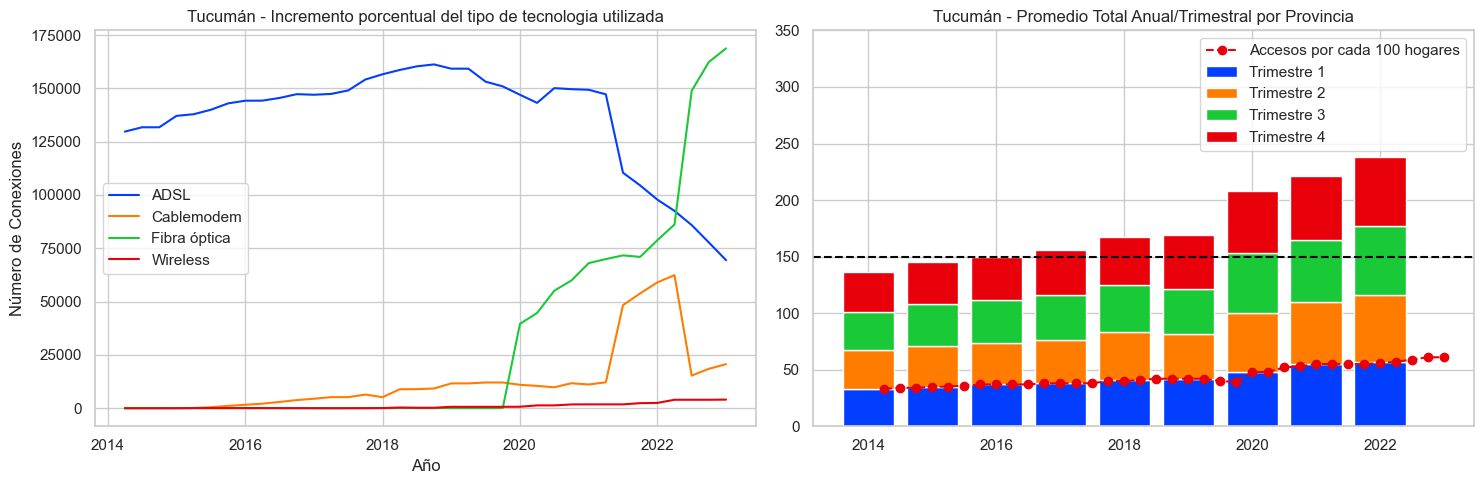

In [25]:
for x in tecnologia_provincia['Provincia'].unique():

    df_provincia = tecnologia_provincia[tecnologia_provincia['Provincia'] == x]
    data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == x]

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    if len(df_provincia) > 0:
        #---> Gráfico 1 - Primer conjunto
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['ADSL'], label='ADSL')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Cablemodem'], label='Cablemodem')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Fibra óptica'], label='Fibra óptica')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Wireless'], label='Wireless')

        axs[0].set_title(f'{x} - Incremento porcentual del tipo de tecnologia utilizada')
        axs[0].set_xlabel('Año')
        axs[0].set_ylabel('Número de Conexiones')
        axs[0].legend()

    if len(data_provincia) > 0:
        #---> Gráfico 2 - Segundo conjunto
        years = data_provincia['Año'].unique()
        bottom = np.zeros(len(years))

        axs[1].plot(data_provincia['Año'] + data_provincia['Trimestre'] / 4, data_provincia['Accesos por cada 100 hogares'], 'ro--', label='Accesos por cada 100 hogares')
        axs[1].set_title(f'{provincia} - Gráfico de líneas')
        axs[1].set_ylim([0, 100])

        for trimestre in sorted(data_provincia['Trimestre'].unique()):
            data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
            axs[1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
            bottom += data_trimestre['Accesos por cada 100 hogares'].values

        axs[1].set_title(f'{provincia} - Promedio Total Anual/Trimestral por Provincia')
        axs[1].legend()
        axs[1].set_ylim([0, 350])
        axs[1].axhline(y=150, linestyle='--', color='black')
    plt.tight_layout()
    plt.show()

### Uno de los indicadores clave a tener en cuenta es el incremento en la inversión destinada a la infraestructura inalámbrica. En el contexto actual, la adquisición de dispositivos como smartphones, laptops o tablets se ha vuelto considerablemente más accesible. Esta accesibilidad nos ofrece una visión nítida sobre la tendencia del mercado, apuntando claramente hacia la preferencia por la conectividad inalámbrica y el impacto creciente de esta tecnología en la sociedad.

En la seccion superior podemos observar la relacion que tienen los incrementos en diferentes tecnologias con la tasa de acceso al internet, evidentemente el aumento en las inversiones en brindar un servicio estable y potente se ve reflejado en la poblacion.

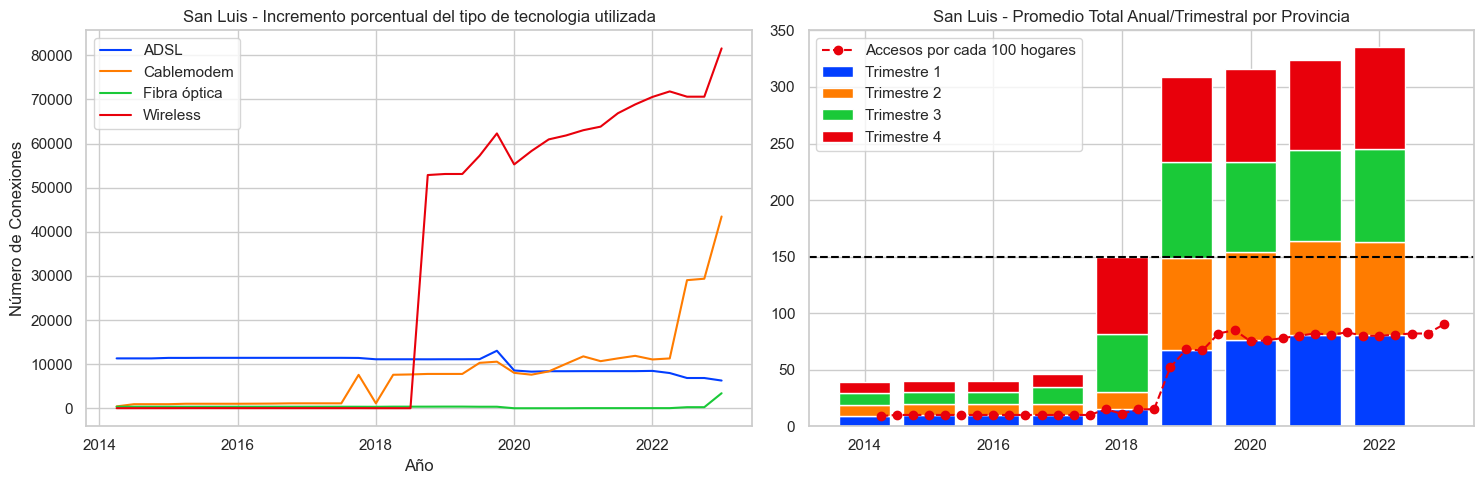

In [26]:
provincia = 'San Luis'

df_provincia = tecnologia_provincia[tecnologia_provincia['Provincia'] == provincia]
data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == provincia]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

if len(df_provincia) > 0:
    #---> Gráfico 1 - Primer conjunto
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['ADSL'], label='ADSL')
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Cablemodem'], label='Cablemodem')
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Fibra óptica'], label='Fibra óptica')
    axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['Wireless'], label='Wireless')

    axs[0].set_title(f'{provincia} - Incremento porcentual del tipo de tecnologia utilizada')
    axs[0].set_xlabel('Año')
    axs[0].set_ylabel('Número de Conexiones')
    axs[0].legend()

if len(data_provincia) > 0:
    #---> Gráfico 2 - Segundo conjunto
    years = data_provincia['Año'].unique()
    bottom = np.zeros(len(years))

    axs[1].plot(data_provincia['Año'] + data_provincia['Trimestre'] / 4, data_provincia['Accesos por cada 100 hogares'], 'ro--', label='Accesos por cada 100 hogares')
    axs[1].set_title(f'{provincia} - Gráfico de líneas')
    axs[1].set_ylim([0, 100])

    for trimestre in sorted(data_provincia['Trimestre'].unique()):
        data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
        axs[1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
        bottom += data_trimestre['Accesos por cada 100 hogares'].values

    axs[1].set_title(f'{provincia} - Promedio Total Anual/Trimestral por Provincia')
    axs[1].legend()
    axs[1].set_ylim([0, 350])
    axs[1].axhline(y=150, linestyle='--', color='black')
    
plt.tight_layout()
plt.show()

#### Tomemos como ejemplo a San Luis, donde se implementó una campaña para expandir la conexión inalámbrica en toda la zona. Este esfuerzo tuvo un impacto significativo al aumentar de forma exponencial la cantidad de accesos por hogar.
Adjunto link de referencia: 
[Visita la página oficial de la noticia](https://agenciasanluis.com/notas/2018/07/13/el-servicio-de-wifi-gratuito-amplia-los-beneficios-transversalmente-a-todos-los-sectores-de-la-comunidad-de-san-luis/)

---

In [27]:
velocidad_provincia = pd.read_csv(r'Data\Internet_Accesos-por-velocidad.csv') #---> Leo el dataset referido al acceso por velocidad de internet
velocidad_provincia = velocidad_provincia.loc[velocidad_provincia['Provincia'].isin(provincias_volumen)]
velocidad_provincia #---> Visualizo el 

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Total
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,70909
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,168759
7,2022,4,Entre Ríos,107,4722,45629,46700,20927,22483,130406,270974
9,2022,4,Jujuy,58,1763,18652,14070,36430,335,46910,118218
11,2022,4,La Rioja,18,595,2531,3010,24435,5029,50644,86262
...,...,...,...,...,...,...,...,...,...,...,...
852,2014,1,Mendoza,35,6,166655,19,10,6,9,166740
855,2014,1,Río Negro,4670,4618,84304,73,1062,1,8,94736
856,2014,1,Salta,53,19677,64061,7192,314,0,0,91297
858,2014,1,San Luis,7,3,12544,0,1,0,2,12557


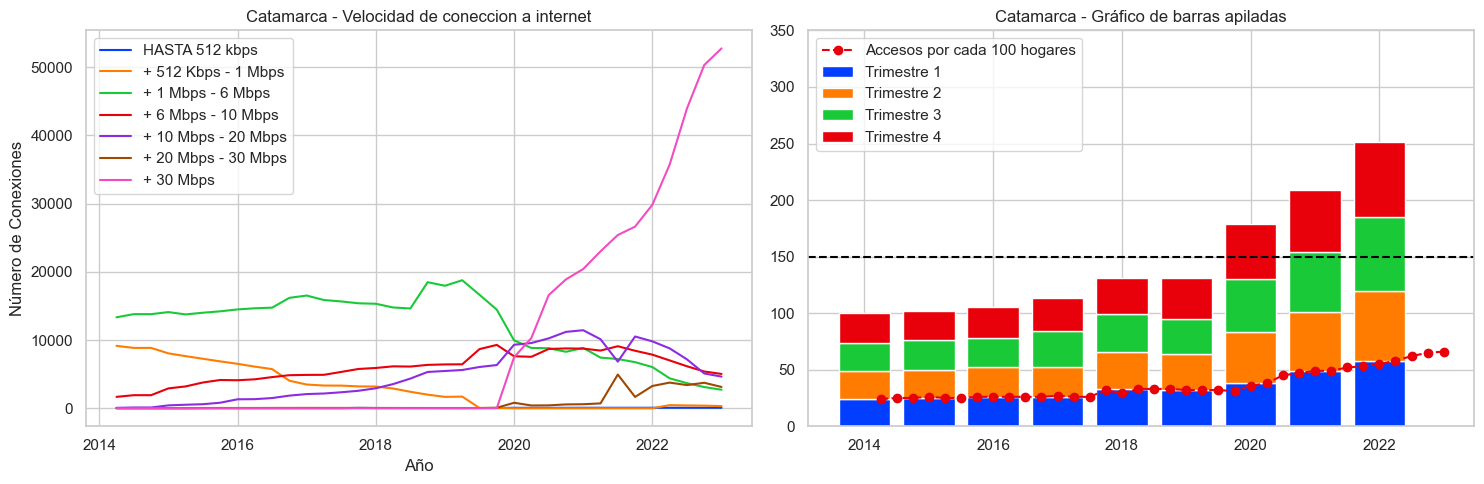

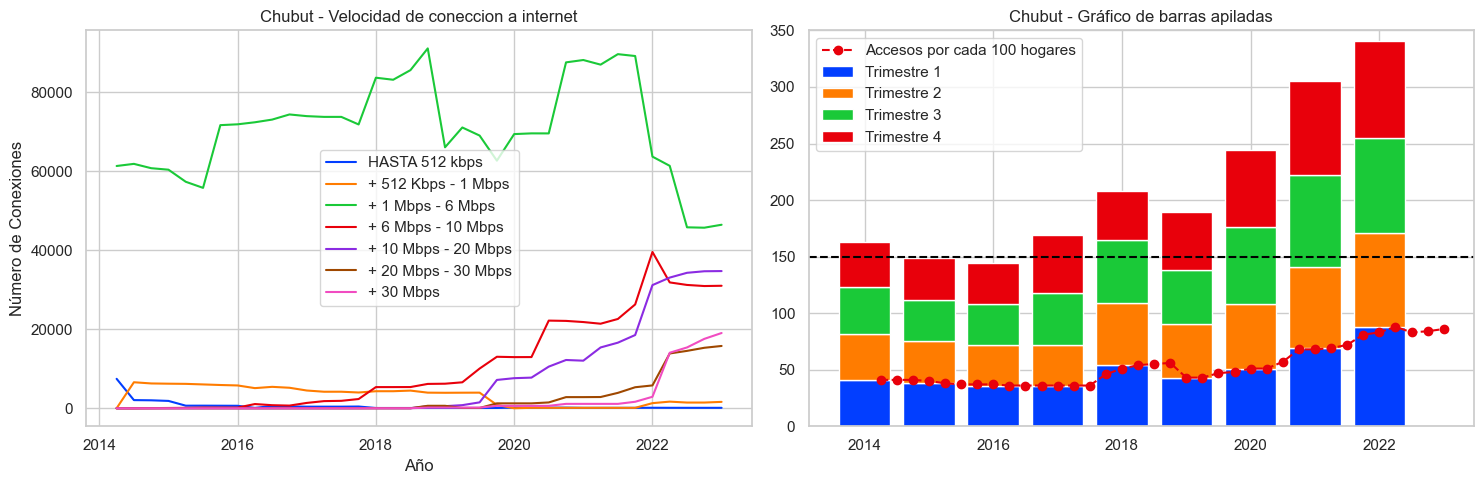

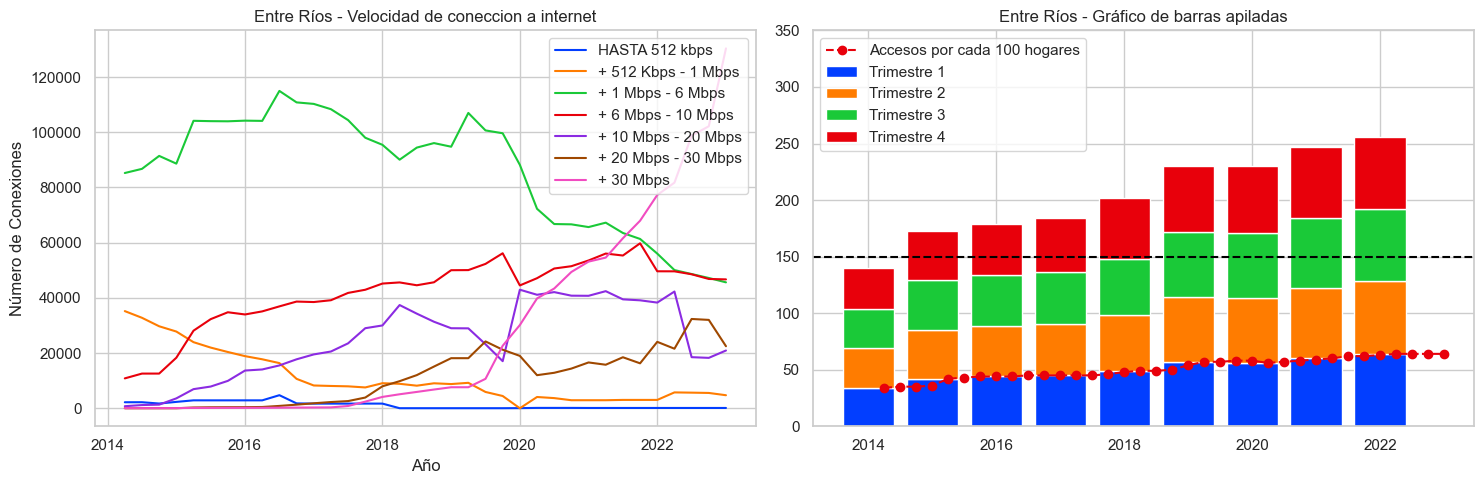

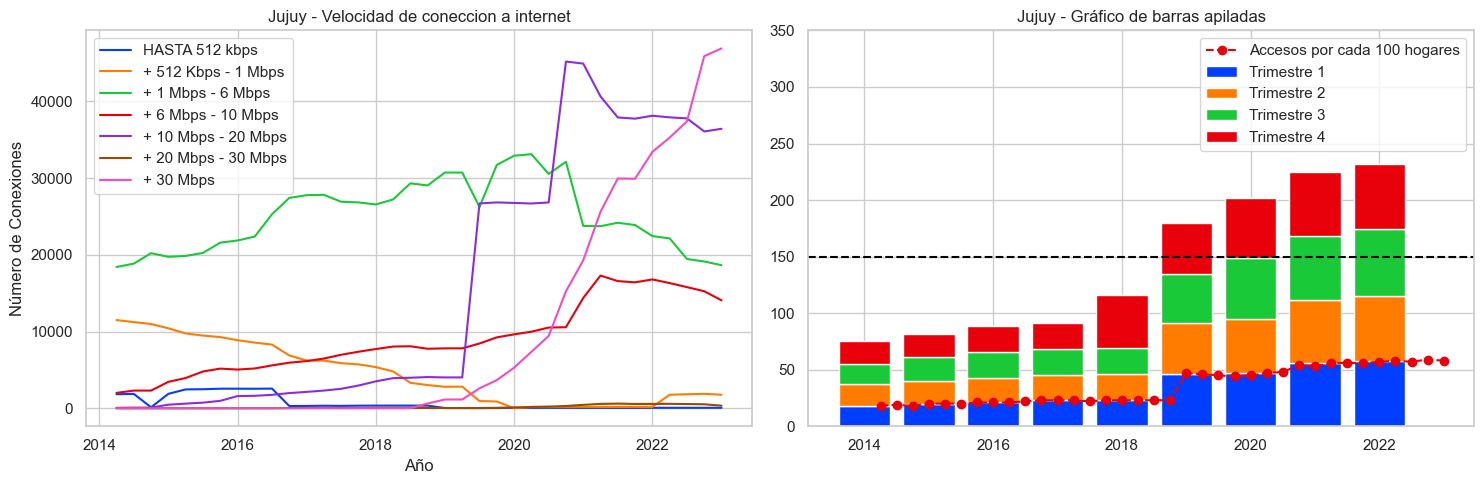

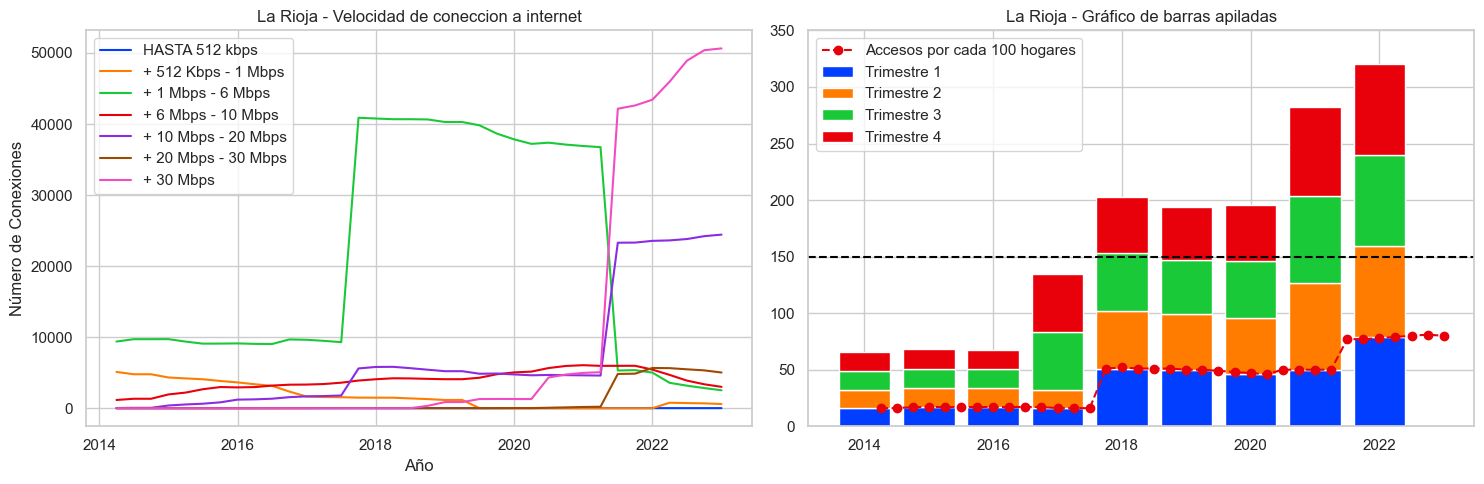

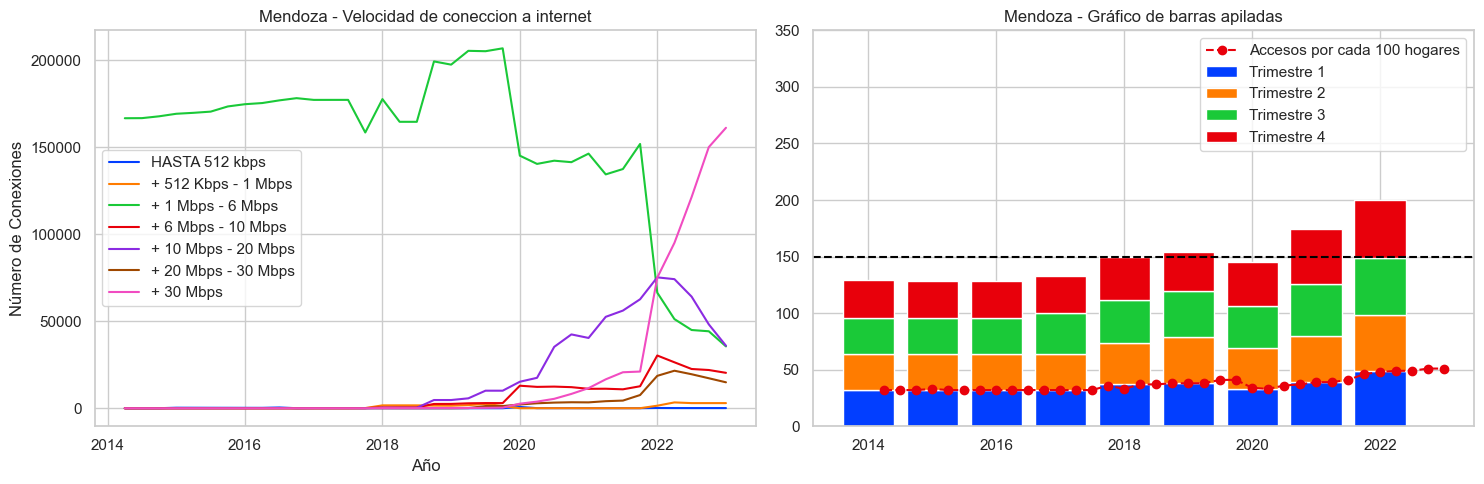

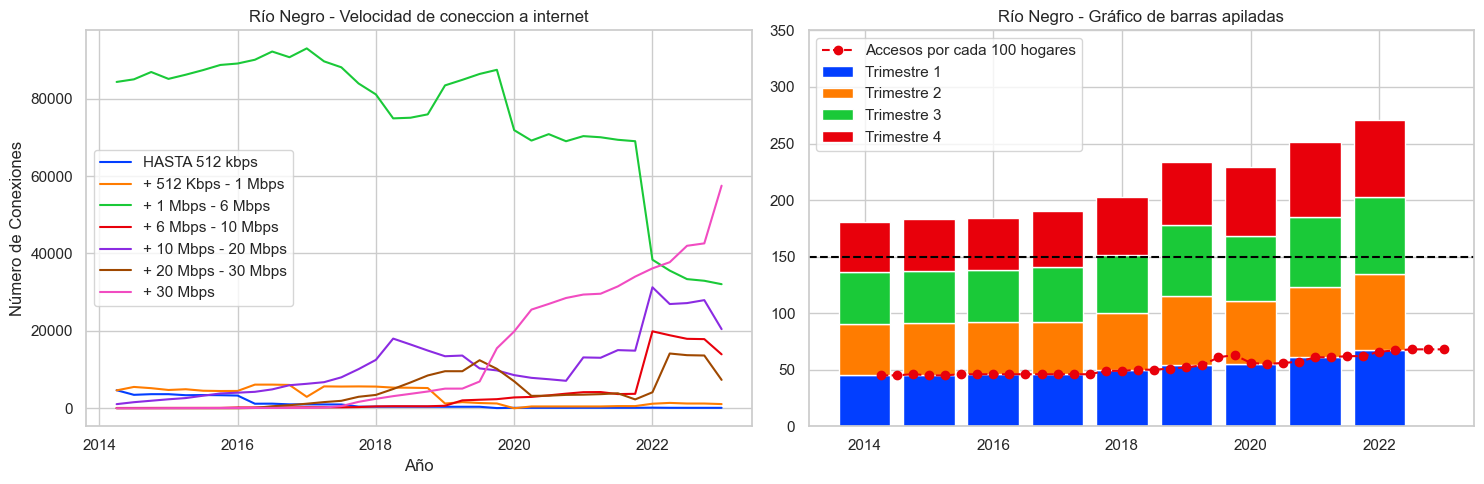

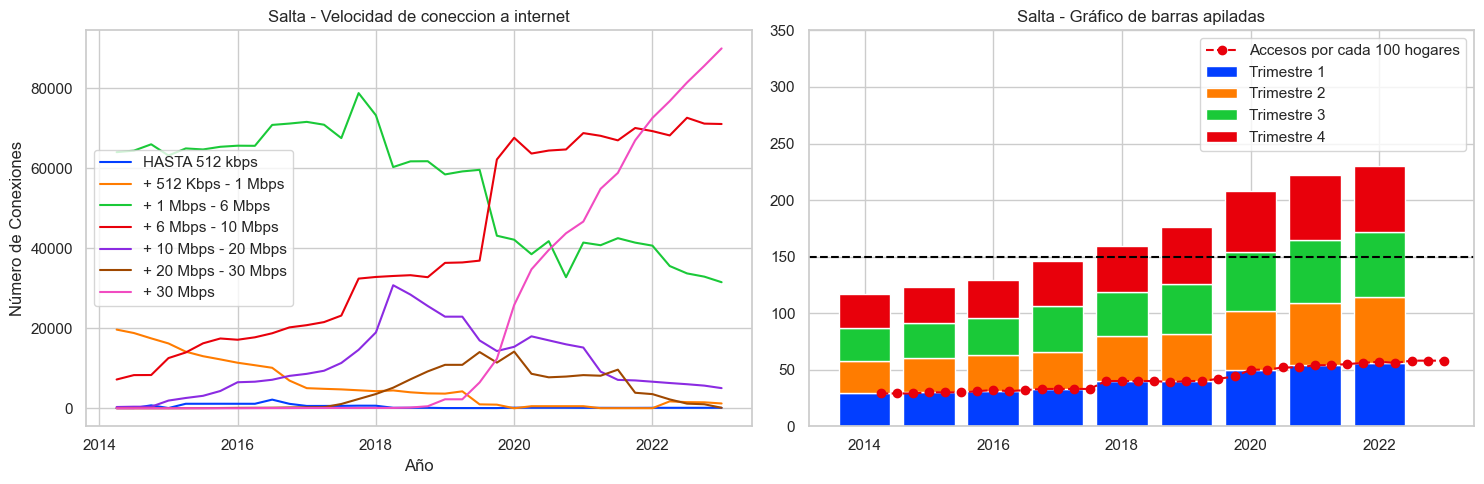

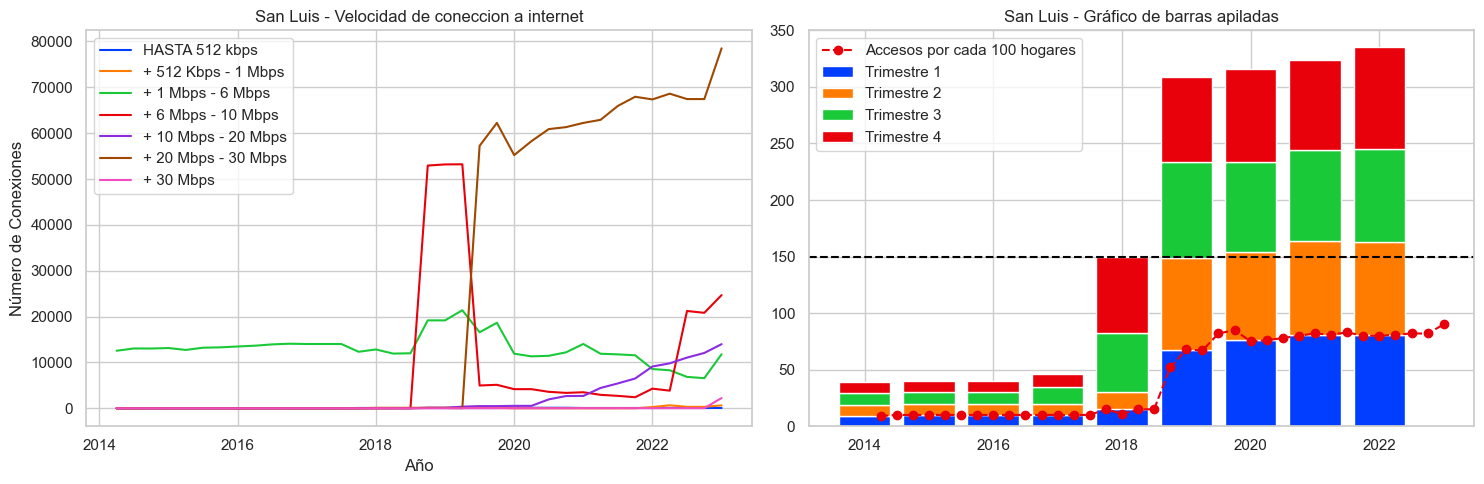

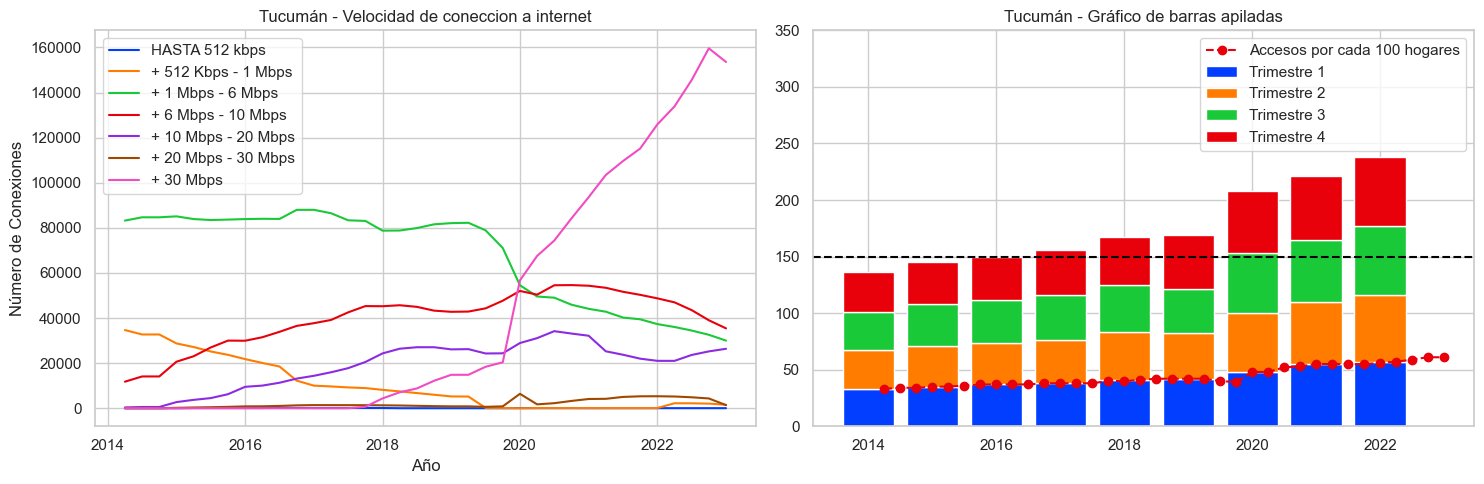

In [28]:
for x in velocidad_provincia['Provincia'].unique():

    df_provincia = velocidad_provincia[velocidad_provincia['Provincia'] == x]
    data_provincia = total_informacion_provincias_volumen[total_informacion_provincias_volumen['Provincia'] == x]

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    if len(df_provincia) > 0:
        #---> Gráfico 1 - Primer conjunto
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['HASTA 512 kbps'], label='HASTA 512 kbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 512 Kbps - 1 Mbps'], label='+ 512 Kbps - 1 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 1 Mbps - 6 Mbps'], label='+ 1 Mbps - 6 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 6 Mbps - 10 Mbps'], label='+ 6 Mbps - 10 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 10 Mbps - 20 Mbps'], label='+ 10 Mbps - 20 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 20 Mbps - 30 Mbps'], label='+ 20 Mbps - 30 Mbps')
        axs[0].plot(df_provincia['Año'] + df_provincia['Trimestre'] / 4, df_provincia['+ 30 Mbps'], label='+ 30 Mbps')

        axs[0].set_title(f'{x} - Velocidad de coneccion a internet')
        axs[0].set_xlabel('Año')
        axs[0].set_ylabel('Número de Conexiones')
        axs[0].legend()

    if len(data_provincia) > 0:
        #---> Gráfico 2 - Segundo conjunto
        years = data_provincia['Año'].unique()
        bottom = np.zeros(len(years))

        axs[1].plot(data_provincia['Año'] + data_provincia['Trimestre'] / 4, data_provincia['Accesos por cada 100 hogares'], 'ro--', label='Accesos por cada 100 hogares')
        axs[1].set_title(f'{x} - Gráfico de líneas')
        axs[1].set_ylim([0, 100])

        for trimestre in sorted(data_provincia['Trimestre'].unique()):
            data_trimestre = data_provincia[data_provincia['Trimestre'] == trimestre]
            axs[1].bar(years, data_trimestre['Accesos por cada 100 hogares'], bottom=bottom, label=f'Trimestre {trimestre}')
            bottom += data_trimestre['Accesos por cada 100 hogares'].values

        axs[1].set_title(f'{x} - Gráfico de barras apiladas')
        axs[1].legend()
        axs[1].set_ylim([0, 350])
        axs[1].axhline(y=150, linestyle='--', color='black')
    
    plt.tight_layout()
    
    plt.show()


### Como podemos observar en la sucesión de gráficos, el crecimiento en la media de acceso a internet por cada 100 hogares muestra una tendencia al alza. Al mismo tiempo, se aprecia un aumento en la media de velocidad de internet. Esto sugiere que a medida que la velocidad y la latencia del servicio mejoran, se produce un aumento en el consumo y una mejora en el porcentaje de acceso.

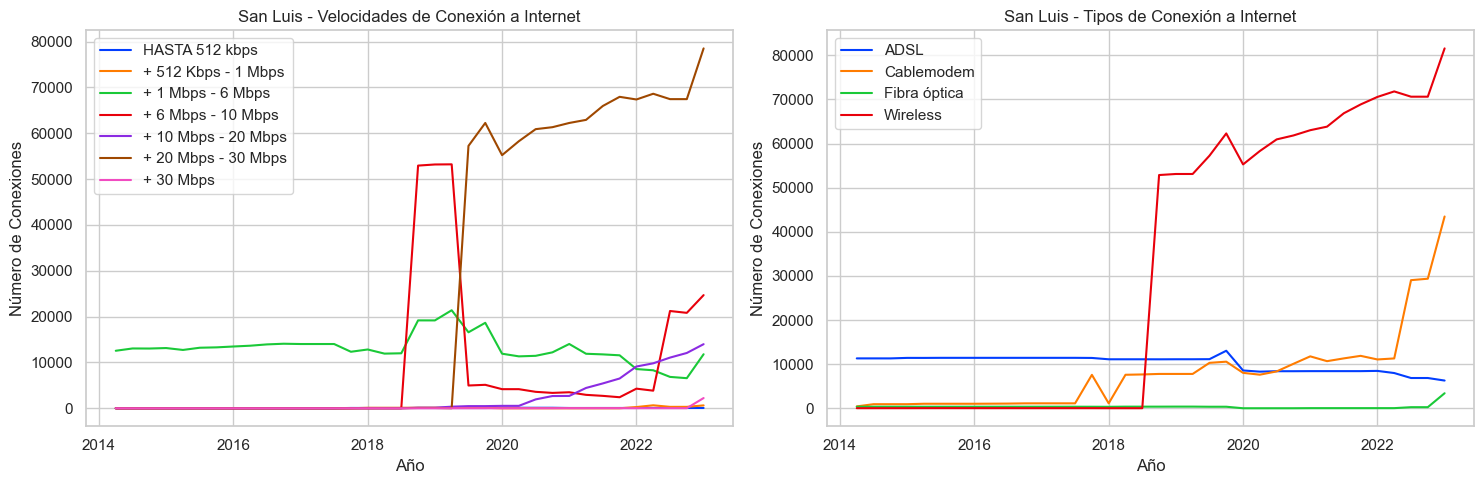

In [29]:
x = 'San Luis'

df_velocidad = velocidad_provincia[velocidad_provincia['Provincia'] == x]
df_tecnologia = tecnologia_provincia[tecnologia_provincia['Provincia'] == x]


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#---> Gráfico 1 - Velocidades de conexión
if len(df_velocidad) > 0:
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['HASTA 512 kbps'], label='HASTA 512 kbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 512 Kbps - 1 Mbps'], label='+ 512 Kbps - 1 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 1 Mbps - 6 Mbps'], label='+ 1 Mbps - 6 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 6 Mbps - 10 Mbps'], label='+ 6 Mbps - 10 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 10 Mbps - 20 Mbps'], label='+ 10 Mbps - 20 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 20 Mbps - 30 Mbps'], label='+ 20 Mbps - 30 Mbps')
    axs[0].plot(df_velocidad['Año'] + df_velocidad['Trimestre'] / 4, df_velocidad['+ 30 Mbps'], label='+ 30 Mbps')

    axs[0].set_title(f'{x} - Velocidades de Conexión a Internet')
    axs[0].set_xlabel('Año')
    axs[0].set_ylabel('Número de Conexiones')
    axs[0].legend()

#---> Gráfico 2 - Tipos de conexión a internet
if len(df_tecnologia) > 0:
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['ADSL'], label='ADSL')
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['Cablemodem'], label='Cablemodem')
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['Fibra óptica'], label='Fibra óptica')
    axs[1].plot(df_tecnologia['Año'] + df_tecnologia['Trimestre'] / 4, df_tecnologia['Wireless'], label='Wireless')

    axs[1].set_title(f'{x} - Tipos de Conexión a Internet')
    axs[1].set_xlabel('Año')
    axs[1].set_ylabel('Número de Conexiones')
    axs[1].legend()

plt.tight_layout()

plt.show()


Tras un análisis exhaustivo, se han identificado diversos KPIs que podrían impulsar el progreso y la competitividad en la industria de las telecomunicaciones. Estos KPIs representan hitos estratégicos y operativos que, de ser implementados con eficacia, podrían impactar significativamente en el crecimiento y la calidad del servicio. Entre los KPIs detectados se encuentran:

#### 1. **Mejora en el acceso a Internet por hogar:**
La meta de aumentar en un 2% el acceso a Internet por cada 100 hogares por trimestre, es un indicador clave que destaca la importancia de ampliar la cobertura y mejorar la conectividad para los usuarios finales. Este KPI enfoca la expansión y la eficiencia en la entrega del servicio.

#### 2. **Mejora del acceso a Internet por hogar en trimestres específicos:**
Enfocarse en incrementar el acceso durante los trimestres 1 y 4 de cada año demuestra una comprensión de las estacionalidades y oportunidades de consumo que pueden ser capitalizadas en momentos específicos del año.

#### 3. **Aumento del porcentaje de redes y conexiones inalámbricas:**
La estrategia de mejorar las conexiones inalámbricas a nivel nacional es esencial para adaptarse a la evolución tecnológica y a las demandas crecientes de conectividad móvil.

#### 4. **Adaptación de la estrategia de marketing durante cambios presidenciales:**
La adaptación de la estrategia publicitaria en tiempos de cambios gubernamentales demuestra sensibilidad a las condiciones políticas y a la capacidad de ajustar las estrategias comerciales para maximizar el impacto.

#### 5. **Reducir progresivamente el uso de redes ADSL:**
La tecnología actual se ha vuelto obsoleta, y es fundamental realizar una transición hacia tecnologías que respalden velocidades mínimas de Internet de 10 Mbps o superiores. Esta perspectiva estratégica refleja una adaptación a las demandas actuales y a las tendencias tecnológicas, con el objetivo de asegurar una infraestructura competitiva y eficiente.

En resumen, estos KPIs representan un equilibrio entre la expansión tecnológica, la mejora en la calidad del servicio y la adaptación a condiciones externas cambiantes. La implementación de estas métricas clave podría contribuir significativamente a la posición competitiva y al crecimiento sostenible en el mercado de las telecomunicaciones.

Bibliografia:
- https://ushuaia24.com.ar/contenido/1816/mejora-el-servicio-tierra-del-fuego-se-une-a-la-red-de-fibra-optica
- https://agenciasanluis.com/notas/2018/07/13/el-servicio-de-wifi-gratuito-amplia-los-beneficios-transversalmente-a-todos-los-sectores-de-la-comunidad-de-san-luis/
- https://www.argentina.gob.ar/noticias/se-lanzo-el-programa-mi-pueblo-conectado-en-santiago-del-estero-con-entrega-de-equipamiento